In [88]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Chemin vers le répertoire contenant les fichiers CSV
folder_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7"

# Lister les fichiers CSV dans le répertoire
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

csv_files

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'log_reg_baseline.csv',
 'model_comparison.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'random_forest_baseline.csv',
 'random_forest_baseline_domain.csv',
 'random_forest_baseline_engineered.csv',
 'sample_submission.csv']

In [90]:
# Training data
app_train = pd.read_csv(r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\application_train.csv")
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [91]:
# Testing data features
app_test = pd.read_csv(r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\application_test.csv")
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

### Examine the Distribution of the Target Column

In [92]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

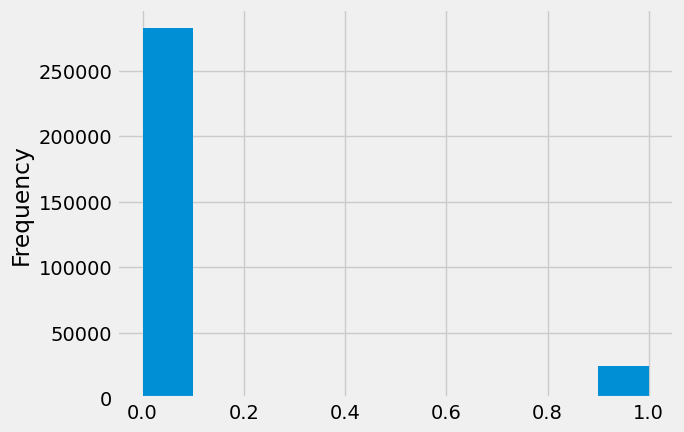

In [93]:
app_train['TARGET'].astype(int).plot.hist();

### Examine Missing Values

In [94]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [95]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

### Column Types

In [96]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [97]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variable

In [98]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [99]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Aligning Training and Testing Data¶
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [100]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Back to Exploratory Data Analysis¶
Anomalies
One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [101]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

#### Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [102]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### That doesn't look right! The maximum value (besides being positive) is about 1000 years!

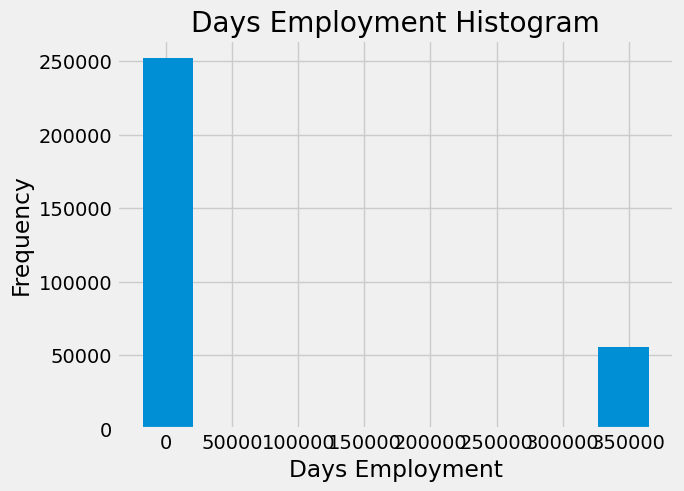

In [103]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

#### Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [104]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


#### Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

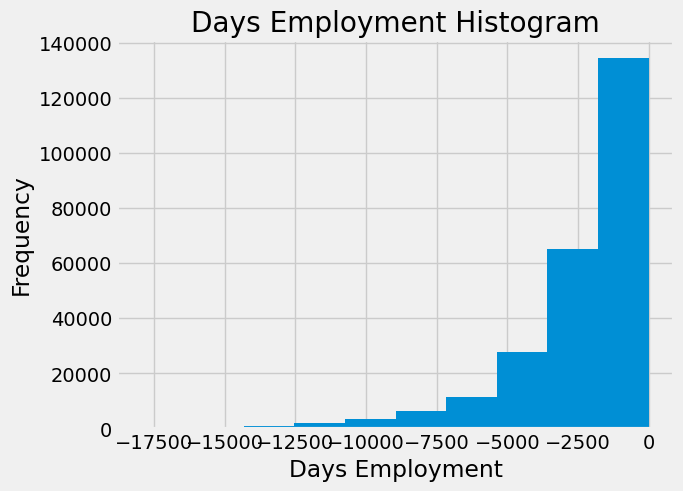

In [105]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

#### The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.

In [106]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


#### Correlations¶
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

In [107]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

#### Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [108]:
# effect on age on repayment
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

##### As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

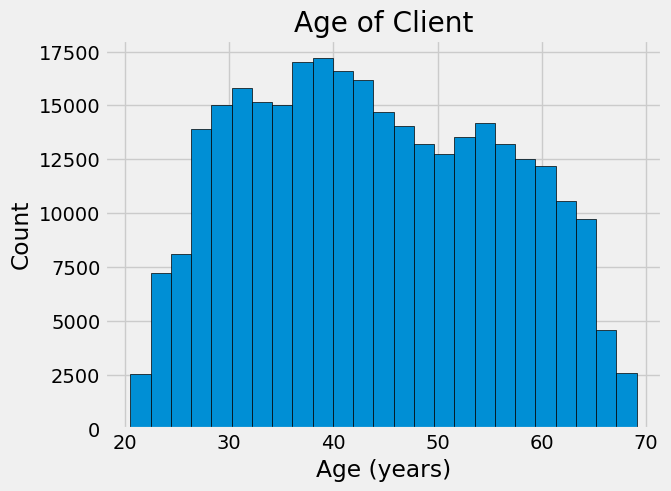

In [109]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

##### By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

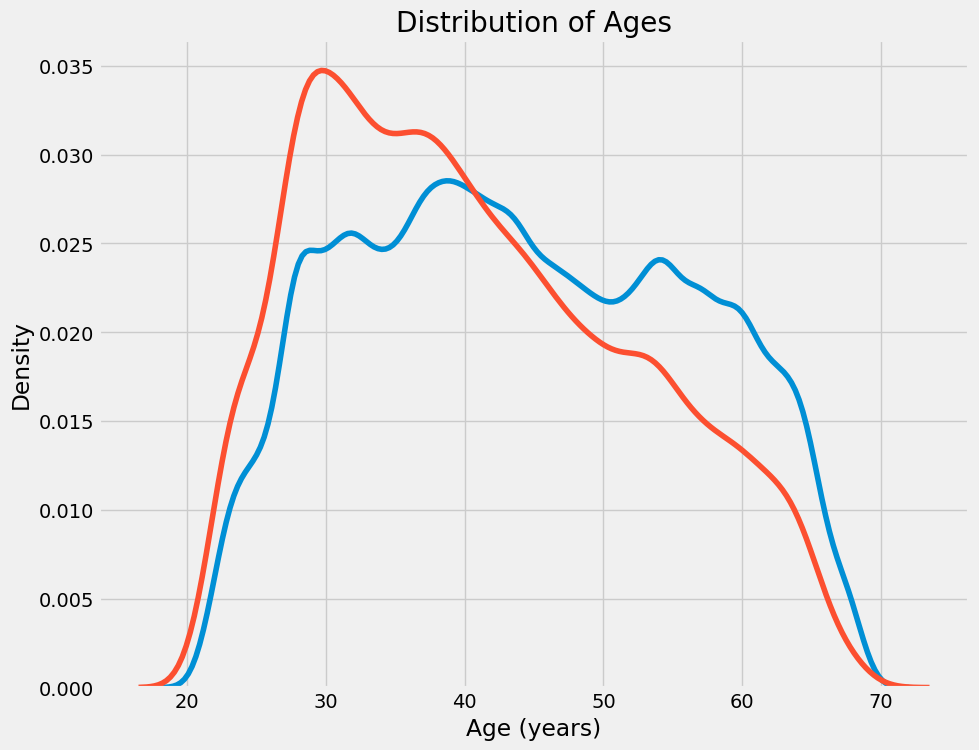

In [110]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

##### The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [111]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [112]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

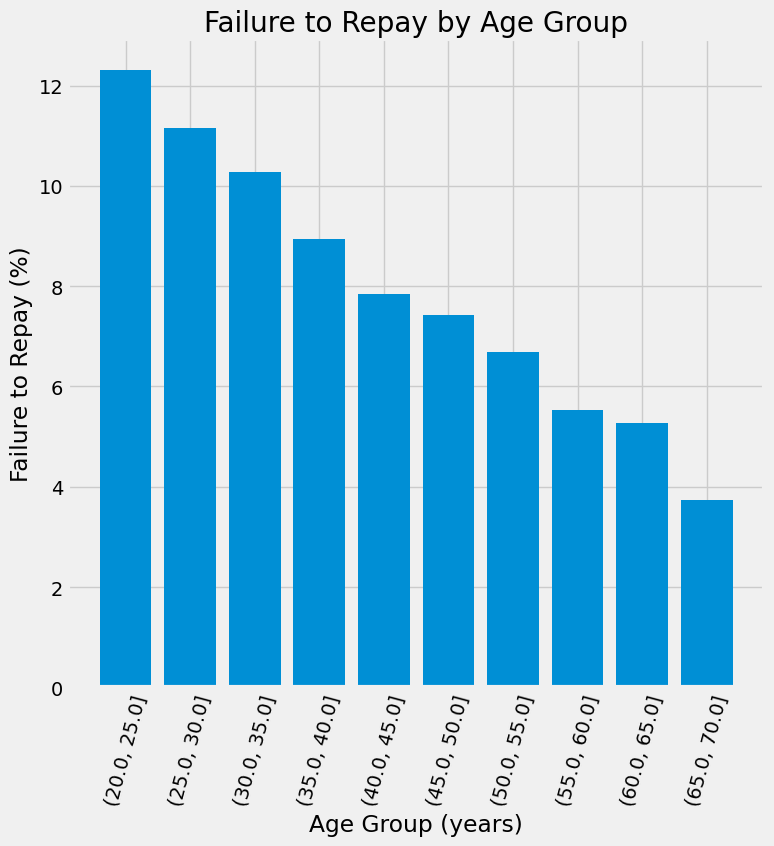

In [113]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');


##### Il y a une tendance claire : les demandeurs les plus jeunes sont plus susceptibles de ne pas rembourser leur prêt ! Le taux de non-remboursement est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus âgée.

Il s’agit d’informations qui pourraient être directement utilisées par la banque : étant donné que les clients plus jeunes sont moins susceptibles de rembourser le prêt, il faudrait peut-être leur fournir davantage de conseils ou de conseils en matière de planification financière. Cela ne signifie pas que la banque doit faire preuve de discrimination à l'égard des clients plus jeunes, mais il serait judicieux de prendre des mesures de précaution pour aider les jeunes clients à payer à temps.

##### Sources extérieures
Les 3 variables présentant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces fonctionnalités représentent un « score normalisé provenant d'une source de données externe ». Je ne suis pas sûr de ce que cela signifie exactement, mais il peut s'agir d'une sorte de notation de crédit cumulative établie à l'aide de nombreuses sources de données.

Jetons un coup d'œil à ces variables.

Tout d’abord, nous pouvons montrer les corrélations des fonctionnalités EXT_SOURCE avec la cible et entre elles..

In [114]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

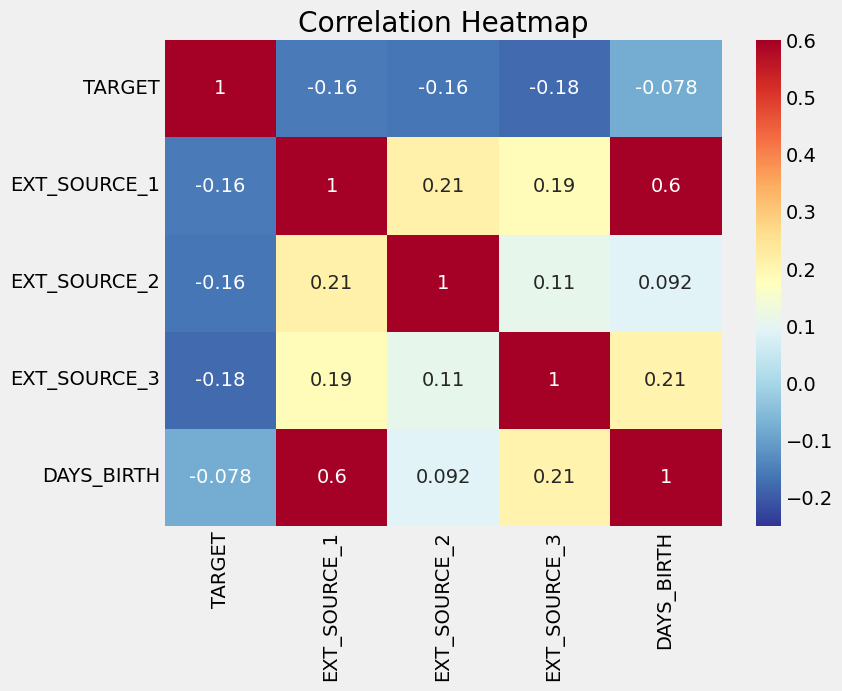

In [115]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

##### All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

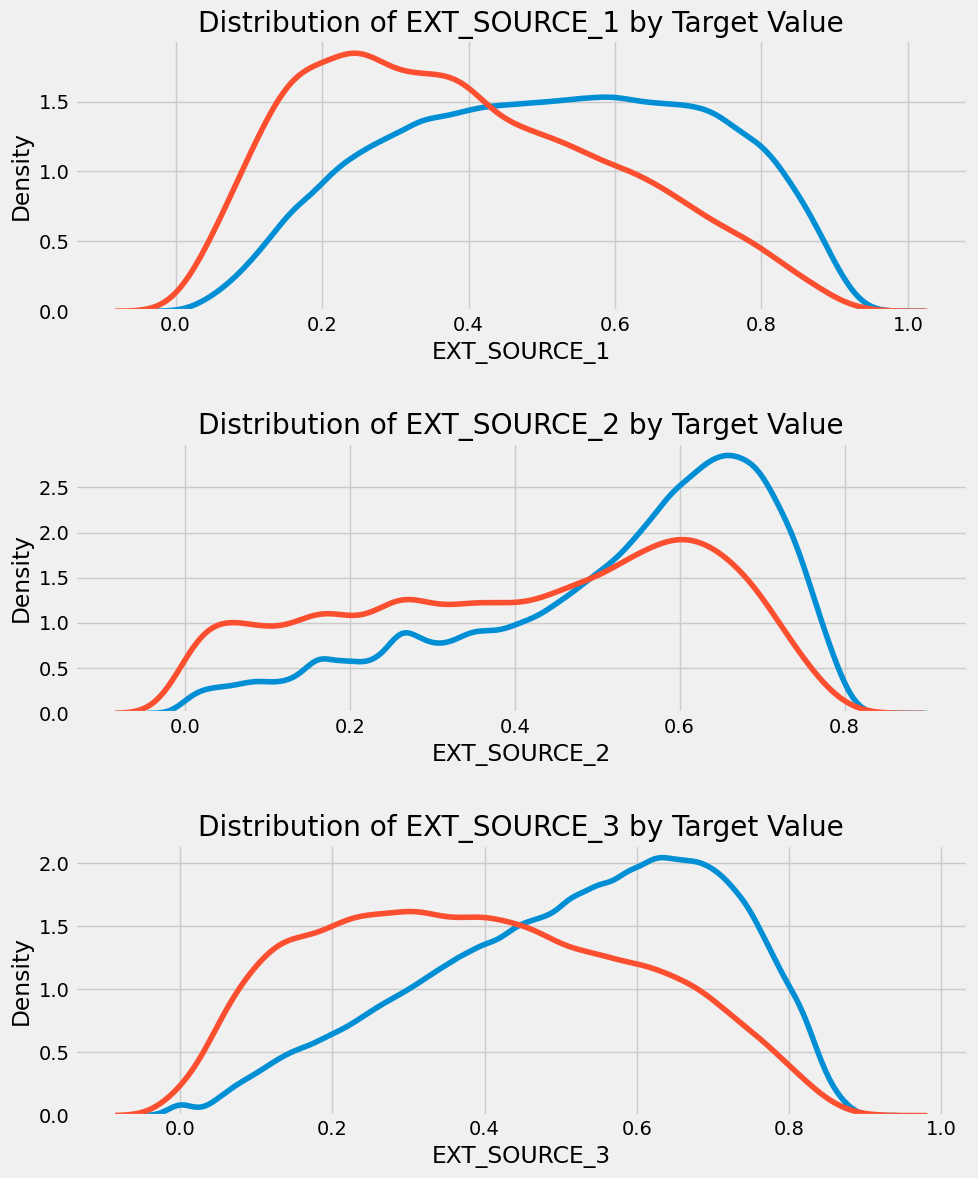

In [116]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

###### EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

#### Pairs Plot
As a final exploratory plot, we can make a pairs plot of the EXT_SOURCE variables and the DAYS_BIRTH variable. The Pairs Plot is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)!

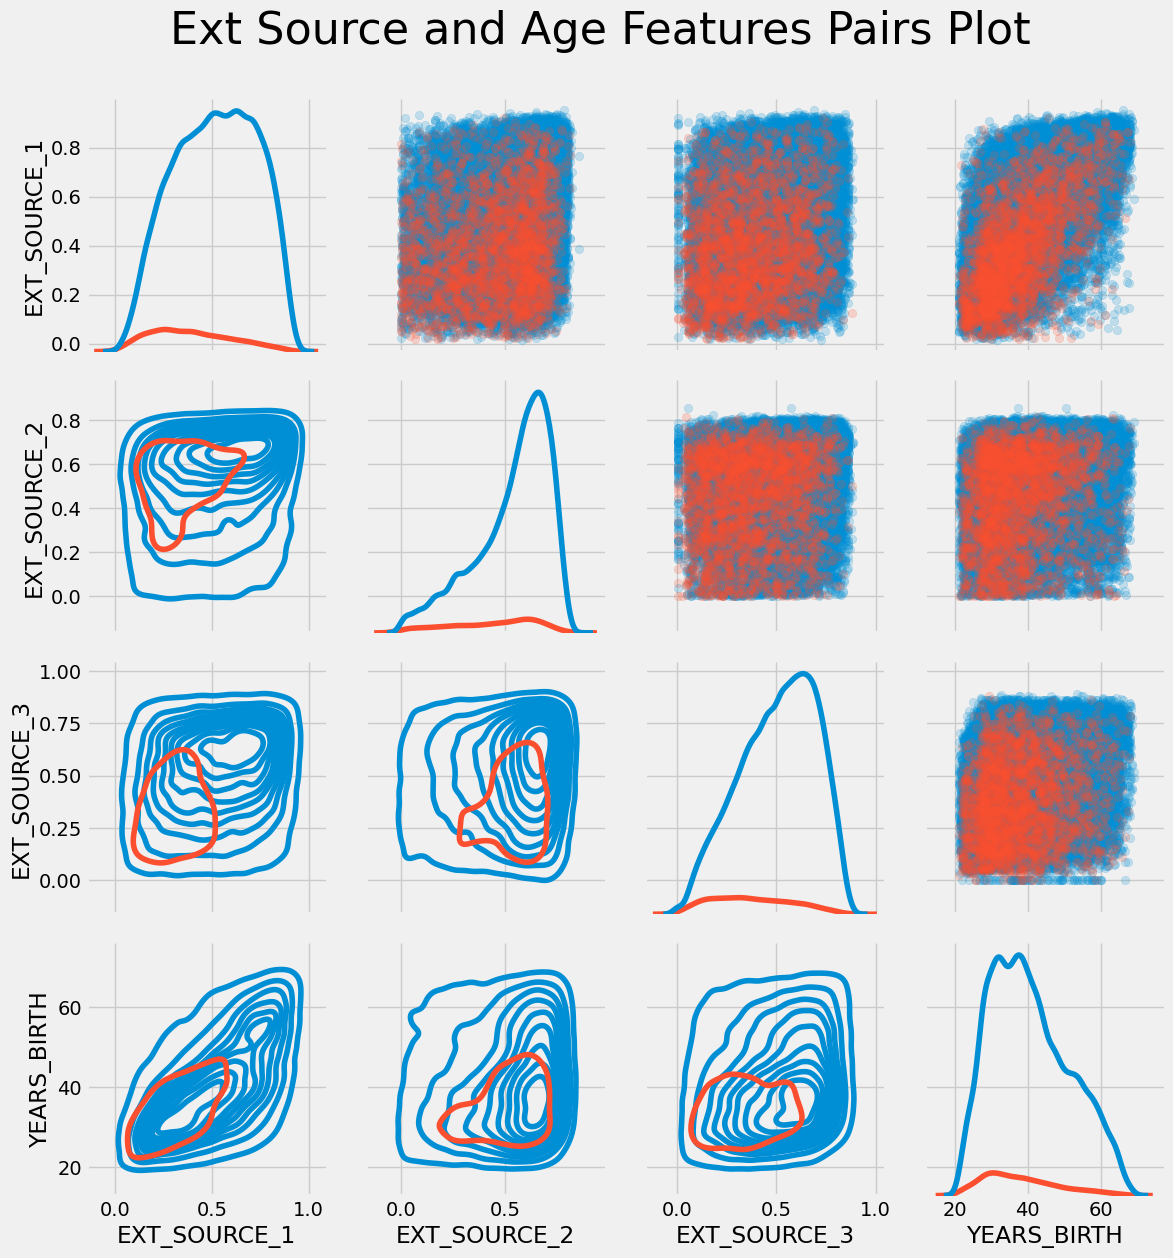

In [117]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

###### In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the EXT_SOURCE_1 and the DAYS_BIRTH (or equivalently YEARS_BIRTH), indicating that this feature may take into account the age of the client.

##### Feature Engineering
Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on gradient boosting). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. This is a great article on the subject). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering."

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some automated tools to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:

Polynomial features
Domain knowledge features
Polynomial Features
One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.

Jake VanderPlas writes about polynomial features in his excellent book Python for Data Science for those who want more information.

In the following code, we create polynomial features using the EXT_SOURCE variables and the DAYS_BIRTH variable. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [118]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


# Imputer for handling missing values
from sklearn.impute import SimpleImputer  # Correct import
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [119]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


##### his creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.

In [120]:
poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

##### There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [121]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


##### Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [122]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


#### Domain Knowledge Features
Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [123]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [124]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize New Variables
We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the TARGET.

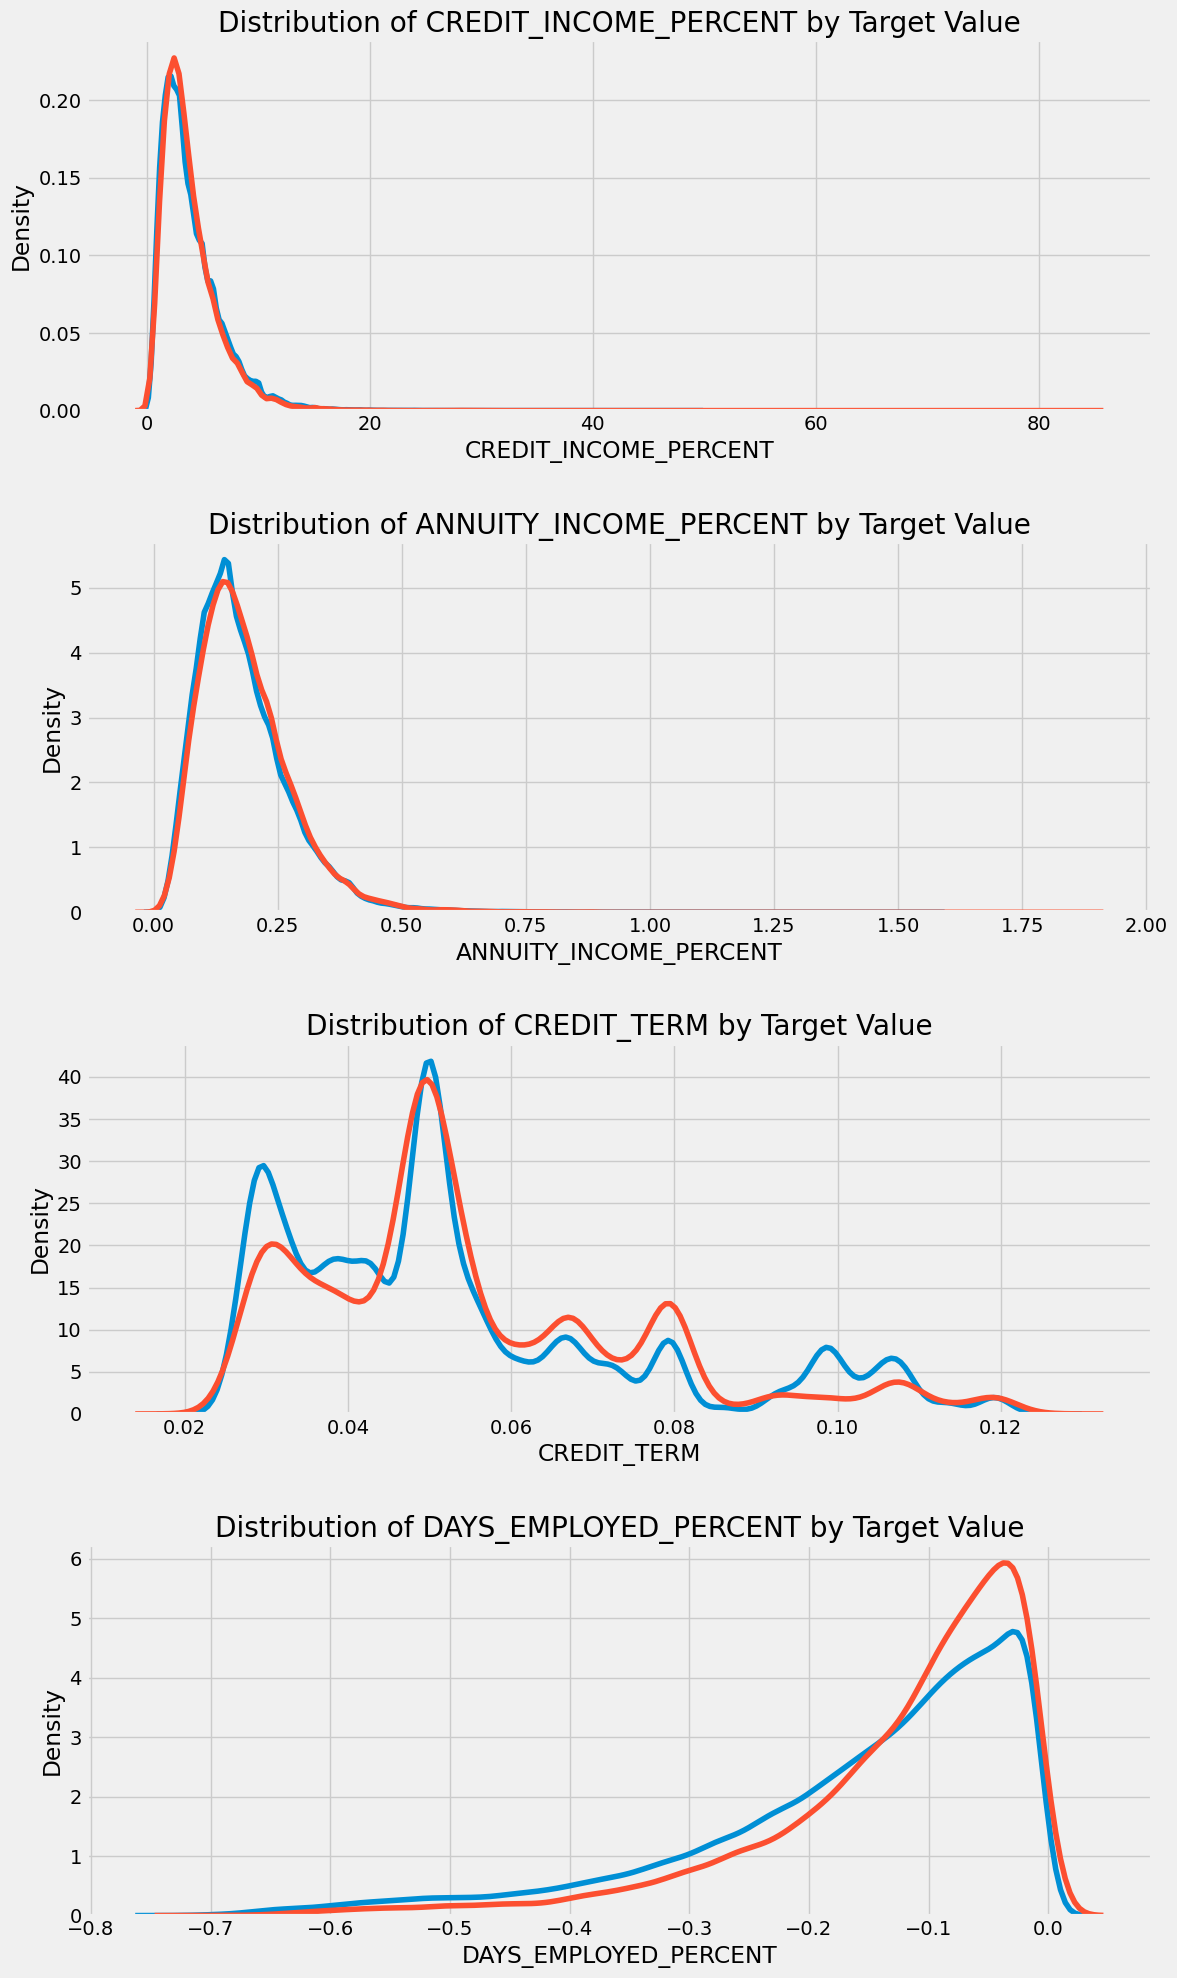

In [125]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

##### Difficile de dire à l’avance si ces nouvelles fonctionnalités seront utiles. La seule façon d’en être sûr est de les essayer !

#### Baseline¶
For a naive baseline, we could guess the same value for all examples on the testing set. We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition (random guessing on a classification task will score a 0.5).

Since we already know what score we are going to get, we don't really need to make a naive baseline guess. Let's use a slightly more sophisticated model for our actual baseline: Logistic Regression.

#### Logistic Regression Implementation¶
Here I will focus on implementing the model rather than explaining the details, but for those who want to learn more about the theory of machine learning algorithms, I recommend both An Introduction to Statistical Learning and Hands-On Machine Learning with Scikit-Learn and TensorFlow. Both of these books present the theory and also the code needed to make the models (in R and Python respectively). They both teach with the mindset that the best way to learn is by doing, and they are very effective!

To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


##### We will use LogisticRegressionfrom Scikit-Learn for our first model. The only change we will make from the default model settings is to lower the regularization parameter, C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default LogisticRegression, but it still will set a low bar for any future models.

Here we use the familiar Scikit-Learn modeling syntax: we first create the model, then we train the model using .fit and then we make predictions on the testing data using .predict_proba (remember that we want probabilities and not a 0 or 1).

In [127]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

##### Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

The following code makes the predictions and selects the correct column.

In [128]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

##### The predictions must be in the format shown in the sample_submission.csv file, where there are only two columns: SK_ID_CURR and TARGET. We will create a dataframe in this format from the test set and the predictions called submit.

In [129]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0      100001  0.078558
1      100005  0.137864
2      100013  0.082147
3      100028  0.081013
4      100038  0.132471

##### The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

In [130]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

The submission has now been saved to the virtual environment in which our notebook is running. To access the submission, at the end of the notebook, we will hit the blue Commit & Run button at the upper right of the kernel. This runs the entire notebook and then lets us download any files that are created during the run.

Once we run the notebook, the files created are available in the Versions tab under the Output sub-tab. From here, the submission files can be submitted to the competition or downloaded. Since there are several models in this notebook, there will be multiple output files.

The logistic regression baseline should score around 0.671 when submitted.

#### Improved Model: Random Forest
To try and beat the poor performance of our baseline, we can update the algorithm. Let's try using a Random Forest on the same training data to see how that affects performance. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [132]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [133]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

#### These predictions will also be available when we run the entire notebook.

This model should score around 0.678 when submitted.

#### Make Predictions using Engineered Features
The only way to see if the Polynomial Features and Domain knowledge improved the model is to train a test a model on these features! We can then compare the submission performance to that for the model without these features to gauge the effect of our feature engineering.

In [134]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [135]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [136]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

##### This model scored 0.678 when submitted to the competition, exactly the same as that without the engineered features. Given these results, it does not appear that our feature construction helped in this case.

Testing Domain Features
Now we can test the domain features we made by hand.

In [137]:
app_train_domain = app_train_domain.drop(columns = 'TARGET', errors='ignore')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [138]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

#### This scores 0.679 when submitted which probably shows that the engineered features do not help in this model (however they do help in the Gradient Boosting Model at the end of the notebook).

In later notebooks, we will do more feature engineering by using the information from the other data sources. From experience, this will definitely help our model!

#### Model Interpretation: Feature Importances¶
As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. Given the correlations we saw in the exploratory data analysis, we should expect that the most important features are the EXT_SOURCE and the DAYS_BIRTH. We may use these feature importances as a method of dimensionality reduction in future work.

In [139]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

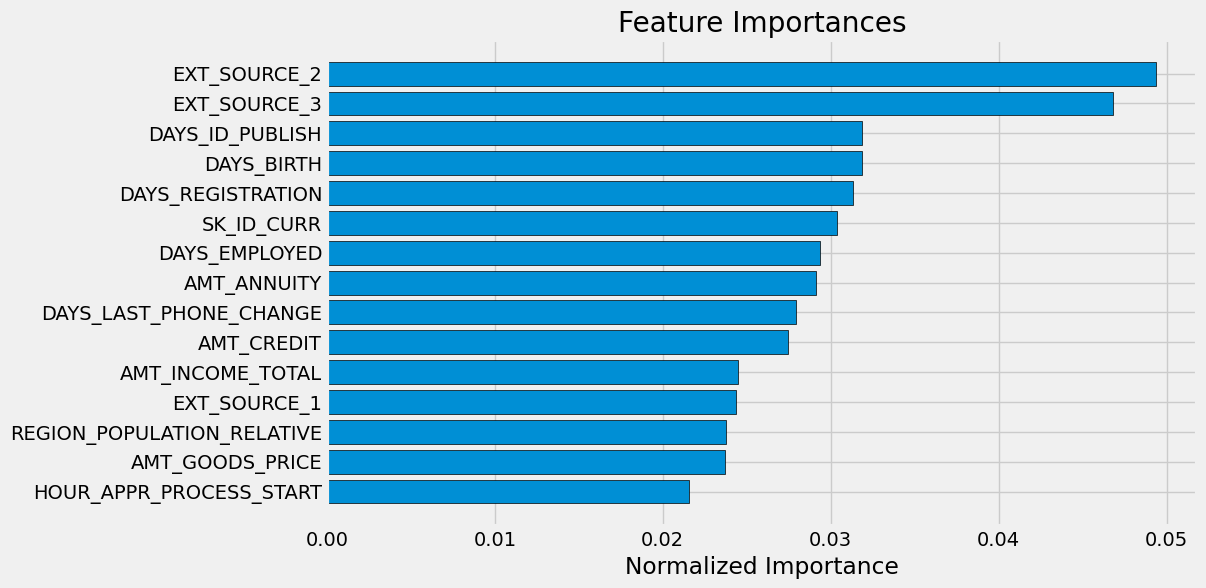

In [140]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

As expected, the most important features are those dealing with EXT_SOURCE and DAYS_BIRTH. We see that there are only a handful of features with a significant importance to the model, which suggests we may be able to drop many of the features without a decrease in performance (and we may even see an increase in performance.) Feature importances are not the most sophisticated method to interpret a model or perform dimensionality reduction, but they let us start to understand what factors our model takes into account when it makes predictions.

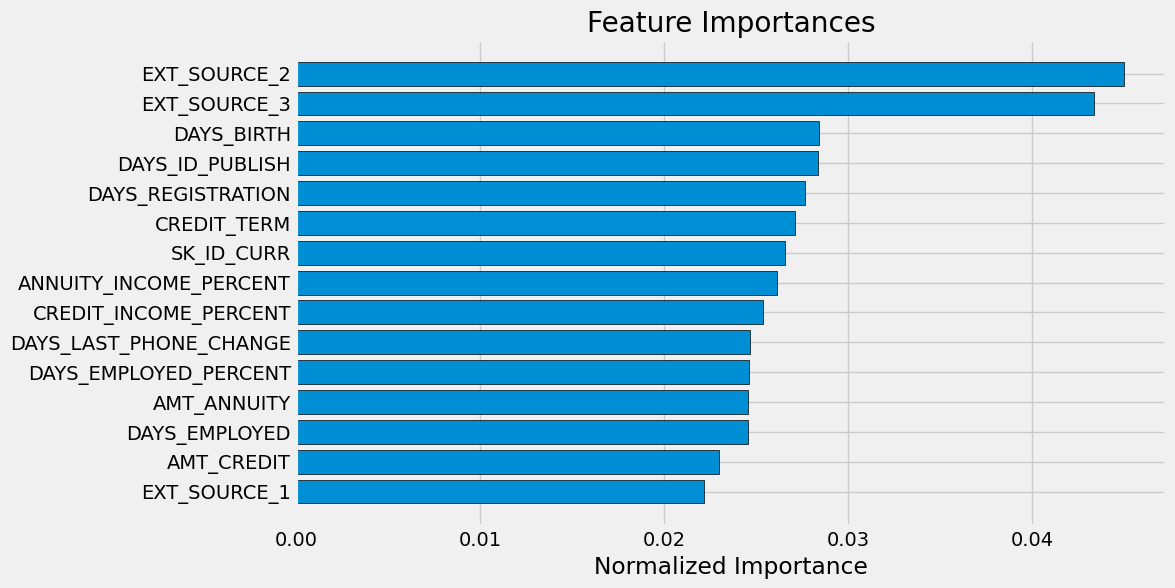

In [141]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

### Suite data exploration
https://www.kaggle.com/code/codename007/home-credit-complete-eda-feature-importance/notebook

In [142]:
app_train.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAP

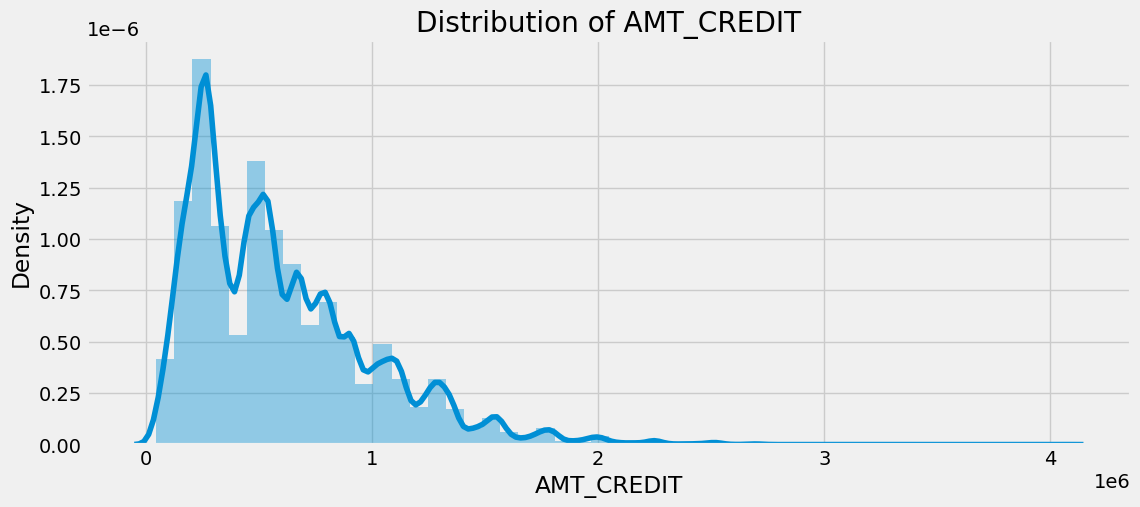

In [143]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

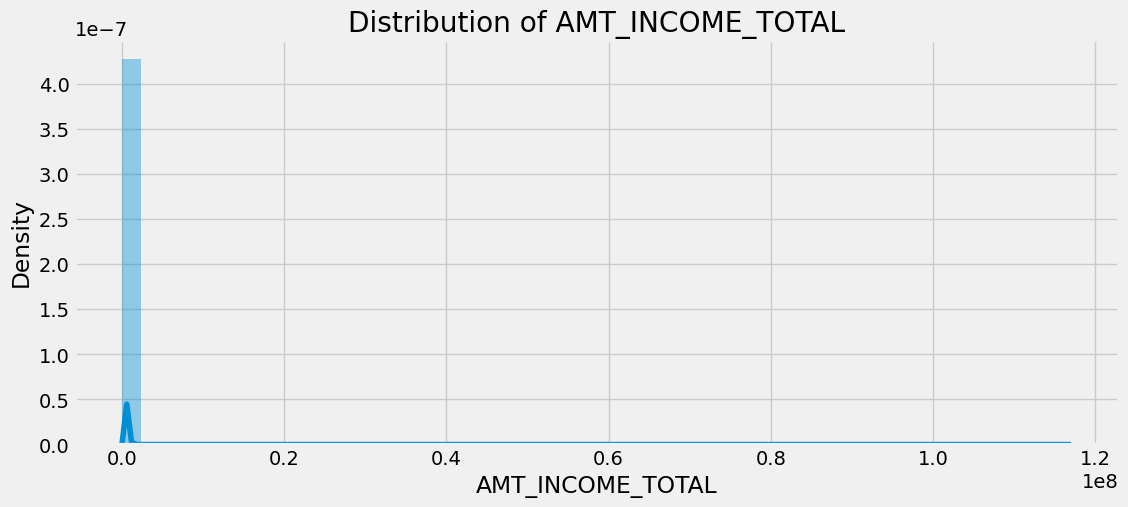

In [144]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(app_train["AMT_INCOME_TOTAL"].dropna())

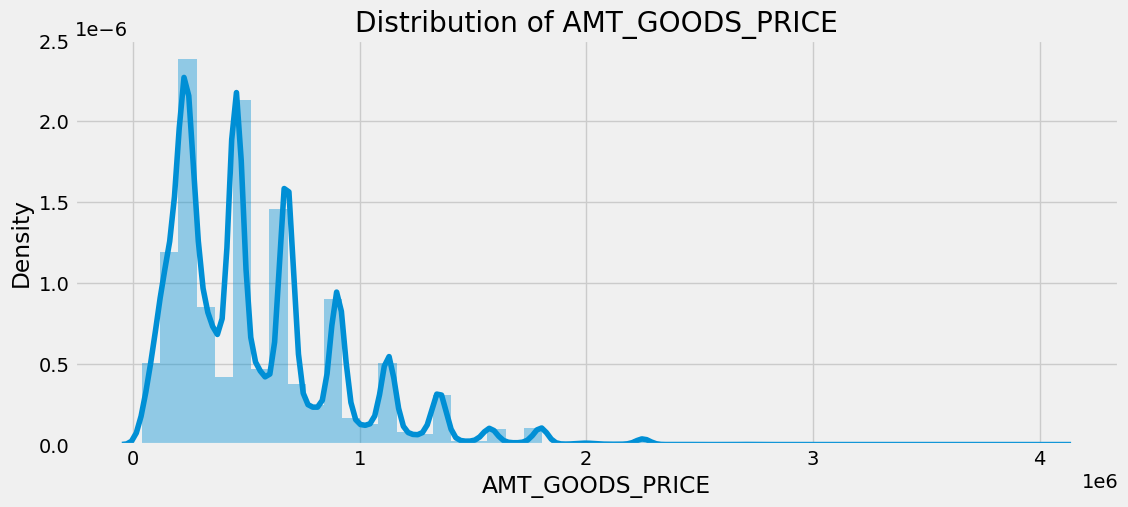

In [145]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())

#### Who accompanied client when applying for the application

In [146]:
# temp = app_train["NAME_TYPE_SUITE"].value_counts()
# #print("Total number of states : ",len(temp))
# trace = go.Bar(
#     x = temp.index,
#     y = (temp / temp.sum())*100,
# )
# data = [trace]
# layout = go.Layout(
#     title = "Who accompanied client when applying for the  application in % ",
#     xaxis=dict(
#         title='Name of type of the Suite',
#         tickfont=dict(
#             size=14,
#             color='rgb(107, 107, 107)'
#         )
#     ),
#     yaxis=dict(
#         title='Count of Name of type of the Suite in %',
#         titlefont=dict(
#             size=16,
#             color='rgb(107, 107, 107)'
#         ),
#         tickfont=dict(
#             size=14,
#             color='rgb(107, 107, 107)'
#         )
# )
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='schoolStateNames')

In [147]:
array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_TYPE_SUITE_Children',
       'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people',
       'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B',
       'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied',
       'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Accountants',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff',
       'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Managers',
       'OCCUPATION_TYPE_Medicine staff',
       'OCCUPATION_TYPE_Private service staff',
       'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Sales staff',
       'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Security staff',
       'OCCUPATION_TYPE_Waiters/barmen staff',
       'WEEKDAY_APPR_PROCESS_START_FRIDAY',
       'WEEKDAY_APPR_PROCESS_START_MONDAY',
       'WEEKDAY_APPR_PROCESS_START_SATURDAY',
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
       'ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Agriculture',
       'ORGANIZATION_TYPE_Bank',
       'ORGANIZATION_TYPE_Business Entity Type 1',
       'ORGANIZATION_TYPE_Business Entity Type 2',
       'ORGANIZATION_TYPE_Business Entity Type 3',
       'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Construction',
       'ORGANIZATION_TYPE_Culture', 'ORGANIZATION_TYPE_Electricity',
       'ORGANIZATION_TYPE_Emergency', 'ORGANIZATION_TYPE_Government',
       'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Housing',
       'ORGANIZATION_TYPE_Industry: type 1',
       'ORGANIZATION_TYPE_Industry: type 10',
       'ORGANIZATION_TYPE_Industry: type 11',
       'ORGANIZATION_TYPE_Industry: type 12',
       'ORGANIZATION_TYPE_Industry: type 13',
       'ORGANIZATION_TYPE_Industry: type 2',
       'ORGANIZATION_TYPE_Industry: type 3',
       'ORGANIZATION_TYPE_Industry: type 4',
       'ORGANIZATION_TYPE_Industry: type 5',
       'ORGANIZATION_TYPE_Industry: type 6',
       'ORGANIZATION_TYPE_Industry: type 7',
       'ORGANIZATION_TYPE_Industry: type 8',
       'ORGANIZATION_TYPE_Industry: type 9',
       'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Kindergarten',
       'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Medicine',
       'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Mobile',
       'ORGANIZATION_TYPE_Other', 'ORGANIZATION_TYPE_Police',
       'ORGANIZATION_TYPE_Postal', 'ORGANIZATION_TYPE_Realtor',
       'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Restaurant',
       'ORGANIZATION_TYPE_School', 'ORGANIZATION_TYPE_Security',
       'ORGANIZATION_TYPE_Security Ministries',
       'ORGANIZATION_TYPE_Self-employed', 'ORGANIZATION_TYPE_Services',
       'ORGANIZATION_TYPE_Telecom', 'ORGANIZATION_TYPE_Trade: type 1',
       'ORGANIZATION_TYPE_Trade: type 2',
       'ORGANIZATION_TYPE_Trade: type 3',
       'ORGANIZATION_TYPE_Trade: type 4',
       'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6',
       'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4',
       'ORGANIZATION_TYPE_University', 'ORGANIZATION_TYPE_XNA',
       'FONDKAPREMONT_MODE_not specified',
       'FONDKAPREMONT_MODE_org spec account',
       'FONDKAPREMONT_MODE_reg oper account',
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_specific housing',
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'DAYS_EMPLOYED_ANOM'], dtype=object)


NameError: name 'array' is not defined

## La préparation des données et le feature engineering : 

### https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features

### 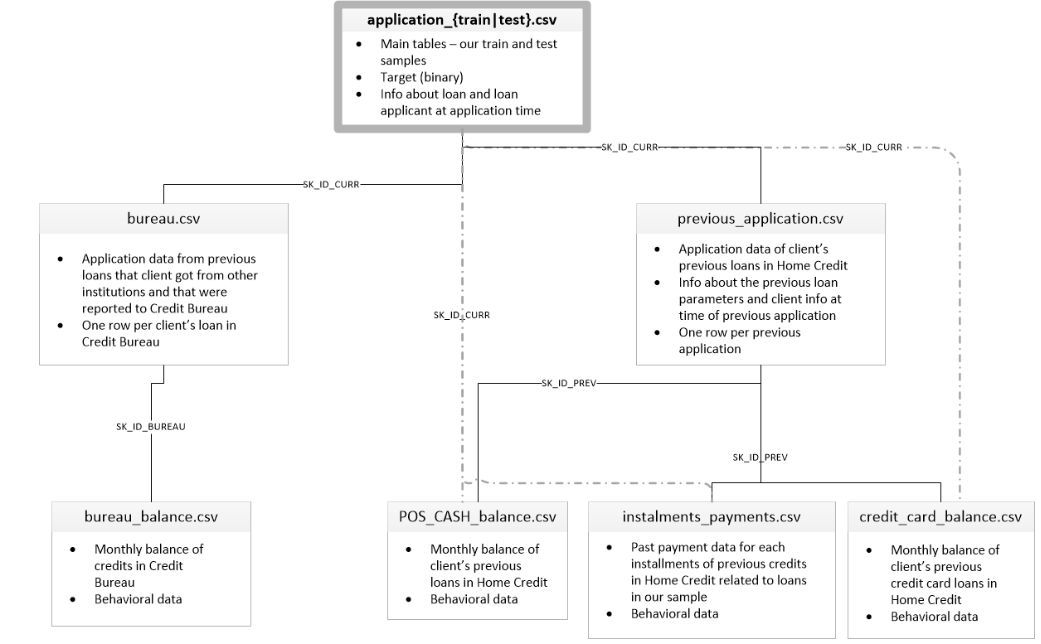

### Je souhaite que vous puissiez mettre en oeuvre au minimum les étapes orientées MLOps suivantes : 

Dans le notebook d’entraînement des modèles, générer à l’aide de MLFlow un tracking d'expérimentations. 
Lancer l’interface web 'UI MLFlow" d'affichage des résultats du tracking. 
Réaliser avec MLFlow un stockage centralisé des modèles dans un “model registry”. 
Tester le serving MLFlow. 
Gérer le code avec le logiciel de version Git. 
Partager le code sur Github pour assurer une intégration continue. 
Utiliser Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud. 
Concevoir des tests unitaires avec Pytest (ou Unittest) et les exécuter de manière automatisée lors du build réalisé par Github Actions

## Feature engineering

#### Option 1 
https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script

In [148]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
# from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    train_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\application_train.csv"
    test_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\application_test.csv"
    df = pd.read_csv(train_path, nrows=num_rows)
    test_df = pd.read_csv(test_path, nrows=num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    # df = df.append(test_df).reset_index()
    df = pd.concat([df, test_df]).reset_index(drop=True)
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\bureau.csv"
    bureau = pd.read_csv(bureau_path, nrows=num_rows)
    bb_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\bureau_balance.csv"
    bb = pd.read_csv(bb_path, nrows=num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\previous_application.csv"
    prev = pd.read_csv(prev_path, nrows=num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\POS_CASH_balance.csv"
    pos = pd.read_csv(pos_path, nrows=num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\installments_payments.csv"
    ins = pd.read_csv(ins_path, nrows=num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc_path = r"C:\Users\BNP\0 - OC - Formation Datascientist\3 - Projet\Projet 7\credit_card_balance.csv"
    cc = pd.read_csv(cc_path, nrows=num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg


def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    print("Initial df shape:", df.shape)  # Print the shape of df to confirm it's loaded

    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        print("df after joining bureau:", df.shape)
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        print("df after joining previous applications:", df.shape)
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        print("df after joining pos:", df.shape)
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        print("df after joining installments payments:", df.shape)
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        print("df after joining credit card balance:", df.shape)
        del cc
        gc.collect()
    # with timer("Run LightGBM with kfold"):
    #     feat_importance = kfold_lightgbm(df, num_folds= 10, stratified= False, debug= debug)
    return df  # Ajout du retour

if __name__ == "__main__":
    with timer("Full model run"):
        df = main()
    print("Final DataFrame shape:", df.shape)

Train samples: 307511, test samples: 48744
Initial df shape: (356251, 247)
Bureau df shape: (305811, 116)
df after joining bureau: (356251, 363)
Process bureau and bureau_balance - done in 41s
Previous applications df shape: (338857, 249)
df after joining previous applications: (356251, 612)
Process previous_applications - done in 60s
Pos-cash balance df shape: (337252, 18)
df after joining pos: (356251, 630)
Process POS-CASH balance - done in 33s
Installments payments df shape: (339587, 26)
df after joining installments payments: (356251, 656)
Process installments payments - done in 49s
Credit card balance df shape: (103558, 141)
df after joining credit card balance: (356251, 797)
Process credit card balance - done in 46s
Full model run - done in 244s
Final DataFrame shape: (356251, 797)


In [149]:
df.shape

(356251, 797)

In [150]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=797)

### Gestion des inf

In [151]:
df = df.replace([np.inf, -np.inf], np.nan)

### Renommage des features
Les caract-res spéciaux ne sont pas pris en compte

In [152]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#### Suppression des colonnes et lignes NA
On supprimes les colonnes et les lignes avec beaucoup de données manquantes (contiennent plus de 40 % de valeurs manquantes (NaN). )

In [153]:
df.shape

(356251, 797)

In [154]:
# nb de colonnes contenant plus de 40 % de valeurs manquantes (Nan)
(df.isna().mean()>0.4).sum()

245

In [155]:
#  calcule la proportion de valeurs manquantes (NaN) dans la colonne TARGET
df.TARGET.isna().mean()

0.1368248790880587

In [156]:
# Garder uniquement les colonnes qui contiennent au plus 40 % de valeurs manquantes.
df = df.loc[:, df.isna().mean() <= 0.4]

In [157]:
# Supprimer les lignes contenant plus de 40 % de valeurs manquantes
df = df.loc[df.T.isna().mean() <= 0.4, :]

In [158]:
df.shape

(339232, 552)

#### Séparation des données + Imputation des valeurs manquantes + Train/test

In [159]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. Séparation initiale des données
train_df = df[df['TARGET'].notnull()]  # Lignes où TARGET n'est pas null
test_df = df[df['TARGET'].isnull()]    # Lignes où TARGET est null

# 2. Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')

# Appliquer l'imputation sur train_df et test_df
train_df.iloc[:, :] = imputer.fit_transform(train_df)
test_df.iloc[:, :] = imputer.transform(test_df)

# 3. Séparer les caractéristiques (X) et la cible (y)
X_train = train_df.drop(columns=['TARGET','SK_ID_CURR'])  # Caractéristiques; enlever aussi l'id
y_train = train_df['TARGET']                 # Cible

X_test = test_df.drop(columns=['TARGET'])    # Caractéristiques du jeu de test
test_df.drop(columns=['TARGET']).to_parquet("data.parquet")

# 4. Nettoyage de y_train

print("Nombre de NaN dans y_train avant nettoyage :", y_train.isnull().sum())
y_train.fillna(y_train.median(), inplace=True)  # Remplacer les NaN par la médiane
assert not y_train.isnull().any(), "y_train contient encore des NaN après le nettoyage."

# # 5. Diviser les données d'entraînement en sous-jeux (entraînement/validation)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.3, random_state=5, stratify=y_train
# )

y_train.fillna(y_train.median(), inplace=True)


# 5. Vérifications
print("Taille de X_train :", X_train.shape)
print("Taille de y_train :", y_train.shape)
# print("Taille de X_val :", X_val.shape)
# print("Taille de y_val :", y_val.shape)
print("Taille de X_test :", X_test.shape)


Nombre de NaN dans y_train avant nettoyage : 0
Taille de X_train : (291377, 550)
Taille de y_train : (291377,)
Taille de X_test : (47855, 551)


### Entraînement et suivi avec MLFlow : Exemple avec un modèle RandomForest

### Mise en place de MLFlow pour le tracking des experimentations

In [160]:
pip install mlflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Le code permet de suivre tout le cycle d'une expérimentation avec MLFlow, notamment :

Les hyperparamètres utilisés pour configurer le modèle.
Les métriques de performance pour évaluer le modèle.
Le modèle lui-même pour être réutilisé ultérieurement.

In [161]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5001")

#### Démarrez l'interface MLFlow en bash en mettant le code
mlflow server --host 0.0.0.0 --port 5001

ouvrir une page web avec http://localhost:5001


In [162]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Modèles

In [163]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.metrics import precision_recall_fscore_support

from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import time

In [164]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    #show()

In [165]:
def business_scorer(y, y_pred) : 
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    error = 10*fn + fp
    return -error

In [166]:
scoring = {'business_scorer': make_scorer(business_scorer, greater_is_better=True),  'auc': 'roc_auc'}

### Paramètres des modèles à utiliser

In [167]:
param_grid_dm = {'dummyclassifier__strategy' : ['most_frequent', 'prior', 'stratified', 'uniform', 'constant'], 
              'dummyclassifier__constant' : [1]
             }  

param_grid_lc = {'logisticregression__C': [0.1, 1.0, 10.0], 
                 'logisticregression__penalty': ['l2'],
                 'logisticregression__solver': ["lbfgs"]
             }  

param_grid_rfc = {'randomforestclassifier__n_estimators': [50, 100], # Réduire le nombre d'arbres
              'randomforestclassifier__min_samples_leaf' : [5], # Augmenter pour limiter la taille des feuilles
              'randomforestclassifier__min_samples_split' : [5], # Augmenter pour réduire la complexité des arbres
              'randomforestclassifier__max_samples': [0.5],  # Utilise 50 % ou 80 % des données pour chaque arbre
              'randomforestclassifier__max_depth' : [5, 10]  # Limiter la profondeur des arbres
             }  


param_grid_lgbm = {'lgbmclassifier__learning_rate': [0.05, 0.1], 
                   'lgbmclassifier__max_depth': [5, 6, 7], 
                   'lgbmclassifier__n_estimators':[50, 100],
                   'lgbmclassifier__is_unbalance': [True, False]
            }

### Les modèles à utiliser

In [168]:
dc = DummyClassifier(random_state=5)
lr = LogisticRegression(random_state=5)
rfc = RandomForestClassifier(random_state=5)
lgbmc = LGBMClassifier(random_state=5, boosting_type = 'goss', objective = 'binary')

#### Fonction qui sélectionne le modèle ayant le meilleur AUC (Area Under Curve) en fonction de son rang, puis extrait :

Son score métier moyen.
Son score AUC moyen.
Le temps moyen qu'il a pris pour s'ajuster (entraîner).
Cela permet de comparer les modèles de manière pratique en fonction de plusieurs critères

In [169]:
def get_scores_and_fitting_time(results) :
    best_cv = results['rank_test_auc'].argmin()
    best_business = results['mean_test_business_scorer'][best_cv]
    best_auc = results['mean_test_auc'][best_cv]
    best_time_fitting = results['mean_fit_time'][best_cv]
    
    return best_business, best_auc, best_time_fitting

In [170]:
#sc = StandardScaler()
scaler = MinMaxScaler(feature_range = (0, 1))

### données utilisées sans oversampling ni undersampling

#### Dummy Classifier (testé avec train/test)

In [171]:
%%time

with mlflow.start_run(run_name='dummy'):

    pipeline = make_pipeline(scaler, dc)  

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_dm, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_dc, best_auc_dc, best_time_fitting_dc = get_scores_and_fitting_time(results)
    best_params_dc = grid_search.best_params_  
    
    #best_score_dc = grid_search.best_score_  
    #cf_matrix_roc_auc(grid_search.best_estimator_, data_train_reduit.TARGET, grid_search.best_estimator_.predict(data_train_reduit.drop('TARGET', axis=1)), grid_search.best_estimator_.predict_proba(data_train_reduit.drop('TARGET', axis=1))[:,1])
    #print(classification_report(data_train_reduit.TARGET, grid_search.best_estimator_.predict(data_train_reduit.drop('TARGET', axis=1))))
    
    print("Meilleurs params :", best_params_dc)
    print("Meilleur business score :", best_business_dc)
    print("AUC :", best_auc_dc)
    print("Fitting time", best_time_fitting_dc)
    
    for param_name in best_params_dc:
        mlflow.log_param(param_name, best_params_dc[param_name])
    
    mlflow.log_metric("Business score", best_business_dc)
    mlflow.log_metric('AUC', best_auc_dc)
    mlflow.log_metric('Fit time', best_time_fitting_dc)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    
    mlflow.end_run()

Meilleurs params : {'dummyclassifier__strategy': 'most_frequent', 'dummyclassifier__constant': 1}
Meilleur business score : -48068.4
AUC : 0.5015500078028776
Fitting time 3.682869243621826


2025/01/22 16:40:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run dummy at: http://localhost:5001/#/experiments/0/runs/1a9959aa746145fcbd77633aba1b9fe7
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 3min 38s
Wall time: 4min 13s


### Regression logistique

In [172]:
%%time

with mlflow.start_run(run_name='Logistic regression'):

    pipeline = make_pipeline(scaler, lr)  

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_lc, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_lr, best_auc_lr, best_time_fitting_lr = get_scores_and_fitting_time(results)
    best_params_lr = grid_search.best_params_  
    
    print("Meilleurs params :", best_params_lr)
    print("Meilleur business score :", best_business_lr)
    print("AUC :", best_auc_lr)
    print("Fitting time", best_time_fitting_lr)
    
    for param_name in best_params_lr:
        mlflow.log_param(param_name, best_params_lr[param_name])
    
    mlflow.log_metric("Business score", best_business_lr)
    mlflow.log_metric('AUC', best_auc_lr)
    mlflow.log_metric('Fit time', best_time_fitting_lr)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    
    mlflow.end_run()

Meilleurs params : {'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__C': 10.0}
Meilleur business score : -46621.4
AUC : 0.7604239321862589
Fitting time 33.00039706230164


2025/01/22 16:50:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic regression at: http://localhost:5001/#/experiments/0/runs/ab2bae1a65c740e481fd9d3fa122d677
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 27min 38s
Wall time: 10min 48s


### LGBM

In [173]:
%%time

with mlflow.start_run(run_name='LGBM'):
    
    pipeline = make_pipeline(scaler, lgbmc)  

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_lgbm, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_lgbmc, best_auc_lgbmc, best_time_fitting_lgbmc = get_scores_and_fitting_time(results)
    best_params_lgbmc = grid_search.best_params_  
    
    print("Meilleurs params :", best_params_lgbmc)
    print("Meilleur business score :", best_business_lgbmc)
    print("AUC :", best_auc_lgbmc)
    print("Fitting time", best_time_fitting_lgbmc)
    
    for param_name in best_params_lgbmc:
        mlflow.log_param(param_name, best_params_lgbmc[param_name])
    
    mlflow.log_metric("Business score", best_business_lgbmc)
    mlflow.log_metric('AUC', best_auc_lgbmc)
    mlflow.log_metric('Fit time', best_time_fitting_lgbmc)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    mlflow.end_run()

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19099, number of negative: 214002
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.026449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55367
[LightGBM] [Info] Number of data points in the train set: 233101, number of used features: 506
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081934 -> initscore=-2.416349
[LightGBM] [Info] Start training from score -2.416349
[LightGBM] [Warning] Found boosting=goss. For b

2025/01/22 17:28:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBM at: http://localhost:5001/#/experiments/0/runs/efb1b3783e4b47cc89205aedf1dfe2af
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 55min 9s
Wall time: 37min 18s


### Random Forest 

In [174]:
%%time

with mlflow.start_run(run_name='Random Forest'):

    pipeline = make_pipeline(scaler, rfc)  

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_rfc, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_rfc, best_auc_rfc, best_time_fitting_rfc = get_scores_and_fitting_time(results)
    best_params_rfc = grid_search.best_params_  
    
    print("Meilleurs params :", best_params_rfc)
    print("Meilleur business score :", best_business_rfc)
    print("AUC :", best_auc_rfc)
    print("Fitting time", best_time_fitting_rfc)
    
    for param_name in best_params_rfc:
        mlflow.log_param(param_name, best_params_rfc[param_name])
    
    mlflow.log_metric("Business score", best_business_rfc)
    mlflow.log_metric('AUC', best_auc_rfc)
    mlflow.log_metric('Fit time', best_time_fitting_rfc)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    
    mlflow.end_run()

Meilleurs params : {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_samples': 0.5, 'randomforestclassifier__max_depth': 5}
Meilleur business score : -47748.0
AUC : 0.7411069459571399
Fitting time 141.9255546092987


2025/01/22 18:00:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://localhost:5001/#/experiments/0/runs/9cc0df7cd6314fa9a6ed9fb5bf72a0d1
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 31min 20s
Wall time: 32min 8s


### Comparaison des meilleurs modèles

In [175]:
best_business = [best_business_dc, best_business_lr, best_business_rfc, best_business_lgbmc]
best_auc = [best_auc_dc, best_auc_lr, best_auc_rfc, best_auc_lgbmc]
best_time = [best_time_fitting_dc, best_time_fitting_lr, best_time_fitting_rfc, best_time_fitting_lgbmc]

In [176]:
best_df = pd.DataFrame(list(zip(best_business, best_auc, best_time)), columns= ['Business Score', 'AUC', 'Fitting time'], index=['Dummy', 'LogisticRegression', 'RandomForest', 'LGBM'])

In [177]:
best_df

Business Score       AUC  Fitting time
Dummy                     -48068.4  0.501550      3.682869
LogisticRegression        -46621.4  0.760424     33.000397
RandomForest              -47748.0  0.741107    141.925555
LGBM                      -46165.6  0.773448     34.157326

In [178]:
best_df['Business Score']

Dummy                -48068.4
LogisticRegression   -46621.4
RandomForest         -47748.0
LGBM                 -46165.6
Name: Business Score, dtype: float64

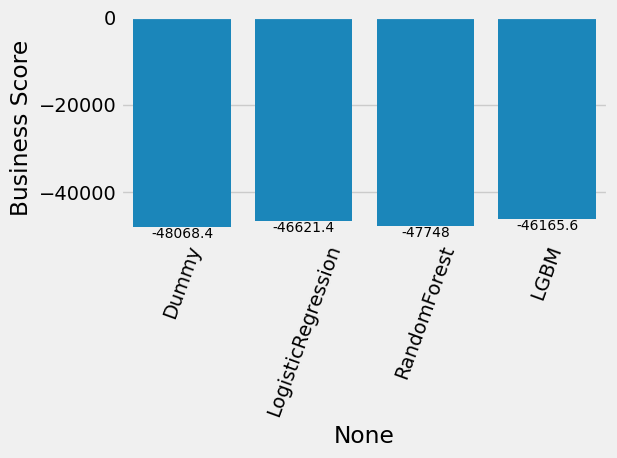

In [179]:
ax = sns.barplot(y='Business Score', x=best_df.index, data=best_df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=70)
plt.tight_layout()

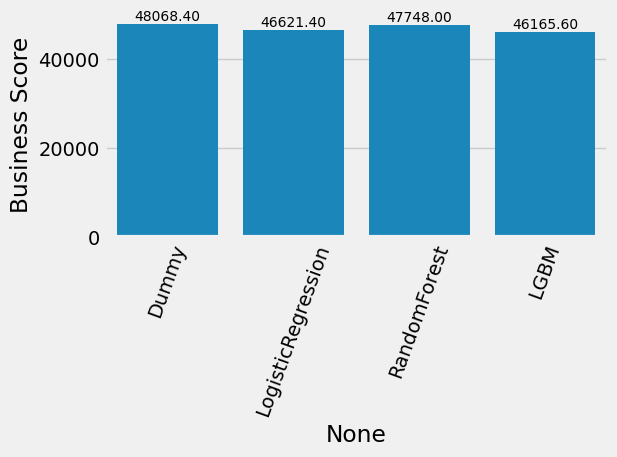

In [180]:
# Créer le graphique en utilisant les valeurs absolues sans modifier le DataFrame
ax = sns.barplot(y=best_df['Business Score'].abs(), x=best_df.index)

# Ajouter les étiquettes aux barres (valeurs positives)
ax.bar_label(ax.containers[0], labels=[f"{val:.2f}" for val in ax.containers[0].datavalues], fontsize=10)

# Rotation des ticks et ajustement
plt.xticks(rotation=70)
plt.tight_layout()



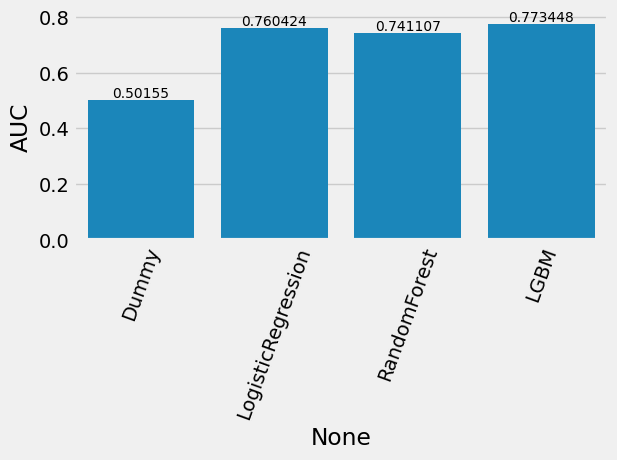

In [181]:
ax = sns.barplot(y='AUC', x=best_df.index, data=best_df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=70)
plt.tight_layout()

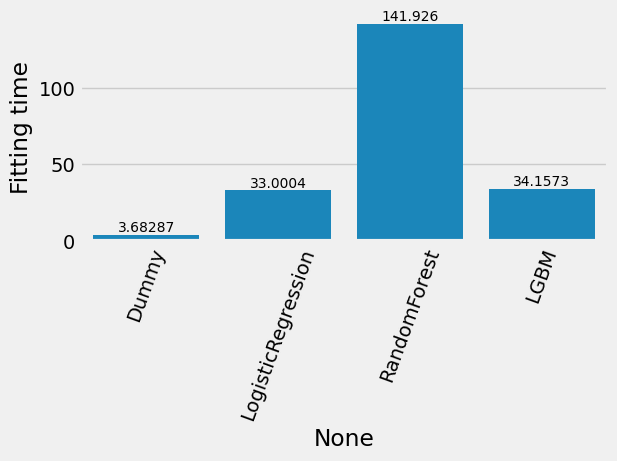

In [182]:
ax = sns.barplot(y='Fitting time', x=best_df.index, data=best_df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=70)
plt.tight_layout()

### Undersampling

In [183]:
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [184]:
# Create the undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=5)

#### Dummy Classifier

In [185]:
%%time

with mlflow.start_run(run_name='dummy_with_undersampling'):

    pipeline = make_imb_pipeline(undersampler, scaler, dc)  

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_dm, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_dc_underS, best_auc_dc_underS, best_time_fitting_dc_underS = get_scores_and_fitting_time(results)
    best_params_dc_underS = grid_search.best_params_  
    
    #best_score_dc = grid_search.best_score_  
    #cf_matrix_roc_auc(grid_search.best_estimator_, data_train_reduit.TARGET, grid_search.best_estimator_.predict(data_train_reduit.drop('TARGET', axis=1)), grid_search.best_estimator_.predict_proba(data_train_reduit.drop('TARGET', axis=1))[:,1])
    #print(classification_report(data_train_reduit.TARGET, grid_search.best_estimator_.predict(data_train_reduit.drop('TARGET', axis=1))))
    
    print("Meilleurs params :", best_params_dc_underS)
    print("Meilleur business score :", best_business_dc_underS)
    print("AUC :", best_auc_dc_underS)
    print("Fitting time", best_time_fitting_dc_underS)
    
    for param_name in best_params_dc_underS:
        mlflow.log_param(param_name, best_params_dc_underS[param_name])
    
    mlflow.log_metric("Business score", best_business_dc_underS)
    mlflow.log_metric('AUC', best_auc_dc_underS)
    mlflow.log_metric('Fit time', best_time_fitting_dc_underS)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    
    mlflow.end_run()

Meilleurs params : {'dummyclassifier__strategy': 'most_frequent', 'dummyclassifier__constant': 1}
Meilleur business score : -47748.0
AUC : 0.5
Fitting time 2.4097307205200194


2025/01/22 18:03:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run dummy_with_undersampling at: http://localhost:5001/#/experiments/0/runs/1ebe1a43aabd4126bf6228d627bf7e9b
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 2min 50s
Wall time: 3min 5s


### Logistic regression

In [186]:
%%time

with mlflow.start_run(run_name='Logistic regression_with_undersampling'):

    pipeline = make_imb_pipeline(undersampler, scaler, lr)   

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_lc, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_lr_underS, best_auc_lr_underS, best_time_fitting_lr_underS = get_scores_and_fitting_time(results)
    best_params_lr_underS = grid_search.best_params_  
    
    print("Meilleurs params :", best_params_lr_underS)
    print("Meilleur business score :", best_business_lr_underS)
    print("AUC :", best_auc_lr_underS)
    print("Fitting time", best_time_fitting_lr_underS)
    
    for param_name in best_params_lr_underS:
        mlflow.log_param(param_name, best_params_lr_underS[param_name])
    
    mlflow.log_metric("Business score", best_business_lr_underS)
    mlflow.log_metric('AUC', best_auc_lr_underS)
    mlflow.log_metric('Fit time', best_time_fitting_lr_underS)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    
    mlflow.end_run()

Meilleurs params : {'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__C': 1.0}
Meilleur business score : -30823.6
AUC : 0.7616133774635955
Fitting time 6.854831218719482


2025/01/22 18:07:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic regression_with_undersampling at: http://localhost:5001/#/experiments/0/runs/a74119f8d82841a6a4cf0a73cd6a43a4
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 5min 45s
Wall time: 3min 34s


### LGBM Classifier

In [187]:
%%time

with mlflow.start_run(run_name='LGBM_with_undersampling'):
    
    pipeline = make_imb_pipeline(undersampler, scaler, lgbmc)    

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_lgbm, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_lgbmc_underS, best_auc_lgbmc_underS, best_time_fitting_lgbmc_underS = get_scores_and_fitting_time(results)
    best_params_lgbmc_underS = grid_search.best_params_  
    
    print("Meilleurs params :", best_params_lgbmc_underS)
    print("Meilleur business score :", best_business_lgbmc_underS)
    print("AUC :", best_auc_lgbmc_underS)
    print("Fitting time", best_time_fitting_lgbmc_underS)
    
    for param_name in best_params_lgbmc_underS:
        mlflow.log_param(param_name, best_params_lgbmc_underS[param_name])
    
    mlflow.log_metric("Business score", best_business_lgbmc_underS)
    mlflow.log_metric('AUC', best_auc_lgbmc_underS)
    mlflow.log_metric('Fit time', best_time_fitting_lgbmc_underS)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    mlflow.end_run()

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19099, number of negative: 19099
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.225449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51529
[LightGBM] [Info] Number of data points in the train set: 38198, number of used features: 482
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

2025/01/22 18:25:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBM_with_undersampling at: http://localhost:5001/#/experiments/0/runs/9d274cf5cb6b4f2aaf41bb3761ced3ea
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 25min 30s
Wall time: 18min 53s


### RandomForest Classifier AVEC UNDERSAMPLING

In [188]:
%%time

with mlflow.start_run(run_name='Random Forest_with_undersampling'):

    pipeline = make_imb_pipeline(undersampler, scaler, rfc) 

    grid_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_rfc, cv=5, scoring=scoring, refit='business_scorer', return_train_score=True)  
    grid_search.fit(X_train, y_train)  
    results = grid_search.cv_results_
    best_business_rfc_underS, best_auc_rfc_underS, best_time_fitting_rfc_underS = get_scores_and_fitting_time(results)
    best_params_rfc_underS = grid_search.best_params_  
    
    print("Meilleurs params :", best_params_rfc_underS)
    print("Meilleur business score :", best_business_rfc_underS)
    print("AUC :", best_auc_rfc_underS)
    print("Fitting time", best_time_fitting_rfc_underS)
    
    for param_name in best_params_rfc_underS:
        mlflow.log_param(param_name, best_params_rfc_underS[param_name])
    
    mlflow.log_metric("Business score", best_business_rfc_underS)
    mlflow.log_metric('AUC', best_auc_rfc_underS)
    mlflow.log_metric('Fit time', best_time_fitting_rfc_underS)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
    
    mlflow.end_run()

Meilleurs params : {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_samples': 0.5, 'randomforestclassifier__max_depth': 10}
Meilleur business score : -32340.4
AUC : 0.7408664924444822
Fitting time 21.069109439849854


2025/01/22 18:35:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest_with_undersampling at: http://localhost:5001/#/experiments/0/runs/75c940ac26874b8696aded4fa6b9a161
🧪 View experiment at: http://localhost:5001/#/experiments/0
CPU times: total: 9min 2s
Wall time: 9min 18s


### Comparaison des meilleurs modèles avec undersampling

In [189]:
best_business_underS = [best_business_dc_underS, best_business_lr_underS, best_business_rfc_underS, best_business_lgbmc_underS]
best_auc_underS = [best_auc_dc_underS, best_auc_lr_underS, best_auc_rfc_underS, best_auc_lgbmc_underS]
best_time_underS = [best_time_fitting_dc_underS, best_time_fitting_lr_underS, best_time_fitting_rfc_underS, best_time_fitting_lgbmc_underS]

In [190]:
best_business_underS

[-47748.0, -30823.6, -32340.4, -30589.0]

In [191]:
best_df_underS = pd.DataFrame(list(zip(best_business_underS, best_auc_underS, best_time_underS)), columns= ['Business Score', 'AUC', 'Fitting time'], index=['Dummy', 'LogisticRegression', 'RandomForest','LGBM'])

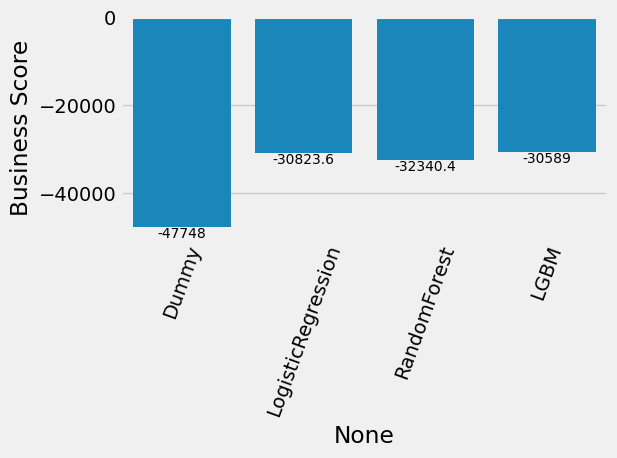

In [192]:
ax = sns.barplot(y='Business Score', x=best_df_underS.index, data=best_df_underS)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=70)
plt.tight_layout()

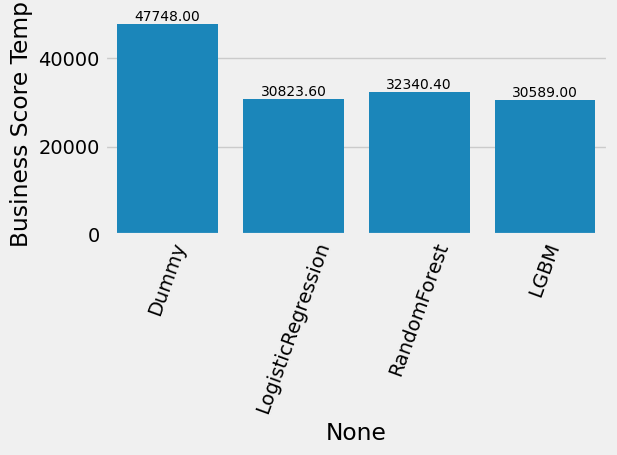

In [193]:
# Créer une copie temporaire des valeurs en positif pour le graphique
best_df_underS['Business Score Temp'] = best_df_underS['Business Score'].abs()

# Créer le graphique en utilisant la colonne temporaire
ax = sns.barplot(y='Business Score Temp', x=best_df_underS.index, data=best_df_underS)

# Ajouter les étiquettes aux barres (en affichant les valeurs positives)
ax.bar_label(ax.containers[0], labels=[f"{val:.2f}" for val in ax.containers[0].datavalues], fontsize=10)

# Rotation des ticks et ajustement
plt.xticks(rotation=70)
plt.tight_layout()

# Optionnel : Supprimer la colonne temporaire après usage
best_df_underS.drop(columns=['Business Score Temp'], inplace=True)


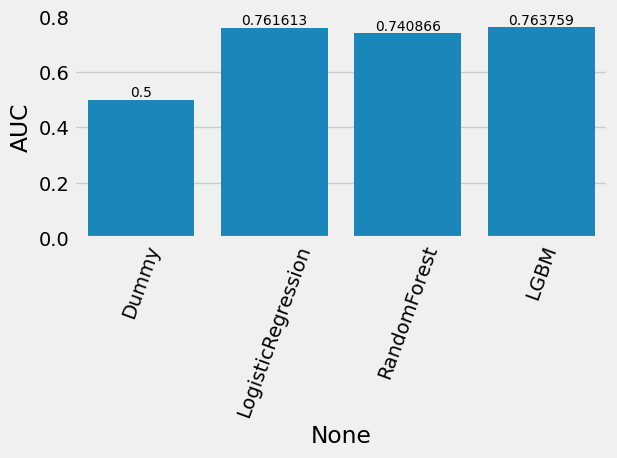

In [194]:
ax = sns.barplot(y='AUC', x=best_df.index, data=best_df_underS)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=70)
plt.tight_layout()

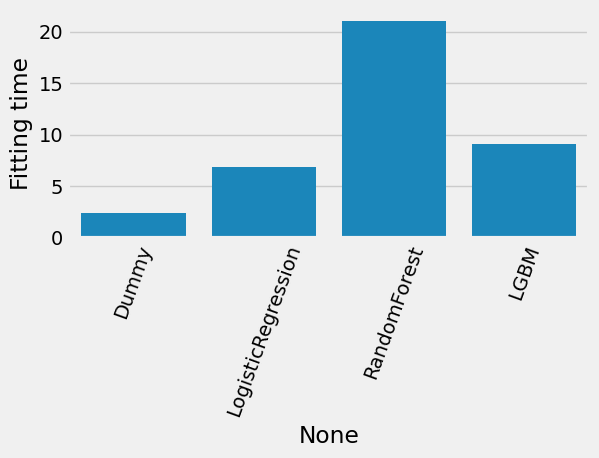

In [195]:
Sax = sns.barplot(y='Fitting time', x=best_df.index, data=best_df_underS)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=70)
plt.tight_layout()

### Comparaison de tous les modèles

In [196]:
pd_total = pd.concat([best_df, best_df_underS]).reset_index()

In [197]:
pd_total

index  Business Score       AUC  Fitting time
0               Dummy        -48068.4  0.501550      3.682869
1  LogisticRegression        -46621.4  0.760424     33.000397
2        RandomForest        -47748.0  0.741107    141.925555
3                LGBM        -46165.6  0.773448     34.157326
4               Dummy        -47748.0  0.500000      2.409731
5  LogisticRegression        -30823.6  0.761613      6.854831
6        RandomForest        -32340.4  0.740866     21.069109
7                LGBM        -30589.0  0.763759      9.078483

In [198]:
pd_total['type'] = ['', '', '', '', 'UnderS', 'UnderS', 'UnderS', 'UnderS']

In [199]:
pd_total

index  Business Score       AUC  Fitting time    type
0               Dummy        -48068.4  0.501550      3.682869        
1  LogisticRegression        -46621.4  0.760424     33.000397        
2        RandomForest        -47748.0  0.741107    141.925555        
3                LGBM        -46165.6  0.773448     34.157326        
4               Dummy        -47748.0  0.500000      2.409731  UnderS
5  LogisticRegression        -30823.6  0.761613      6.854831  UnderS
6        RandomForest        -32340.4  0.740866     21.069109  UnderS
7                LGBM        -30589.0  0.763759      9.078483  UnderS

2. Meilleur modèle selon les critères :
a) Business Score :
Le modèle LGBM avec sous-échantillonnage (UnderS) a le meilleur score métier : -30,589.0.
Cela signifie que ce modèle est le plus performant en termes d'impact métier.
b) AUC :
Le modèle LGBM sans sous-échantillonnage a l'AUC la plus élevée : 0.7736.
Cela indique qu'il est le plus précis pour distinguer les classes.
c) Fitting Time :
Le modèle Logistic Regression avec UnderS est le plus rapide : 5.68 secondes.
Cela peut être un avantage dans des contextes où le temps de calcul est une contrainte.


Le meilleur modèle dépend du contexte et des priorités :

Si votre priorité est le Business Score, choisissez le LGBM avec UnderS (-30,589.0).

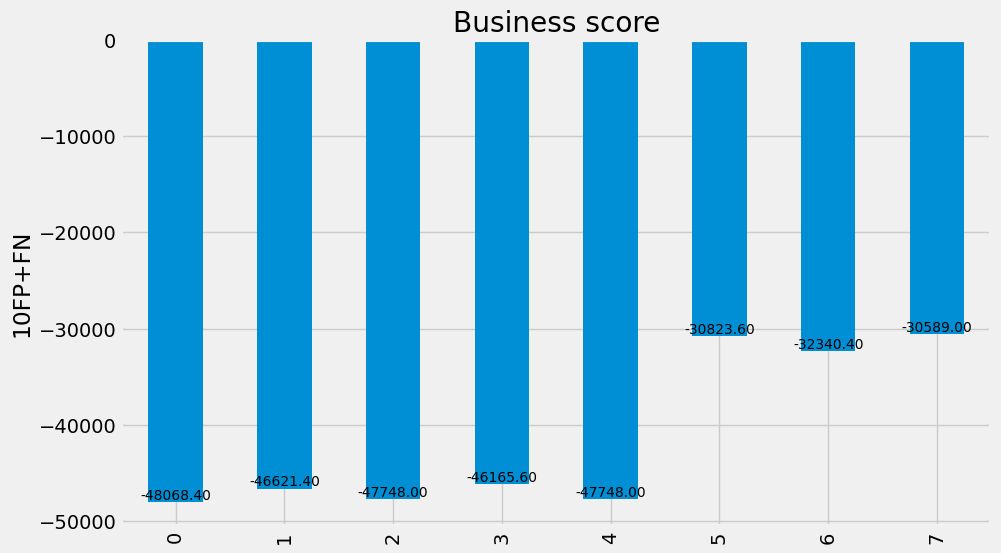

In [200]:
import matplotlib.pyplot as plt

# Tracer le graphique et obtenir l'objet Axes
ax = pd_total['Business Score'].plot(kind='bar', title='Business score', ylabel='10FP+FN', figsize=(10, 6))

# Ajouter des étiquettes au-dessus des barres
for p in ax.patches:  # Parcourt chaque barre
    ax.annotate(f'{p.get_height():.2f}',  # Format de l'étiquette (2 décimales)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position (centre de la barre)
                ha='center', va='bottom', fontsize=10)  # Alignement et style

# Afficher le graphique
plt.show()


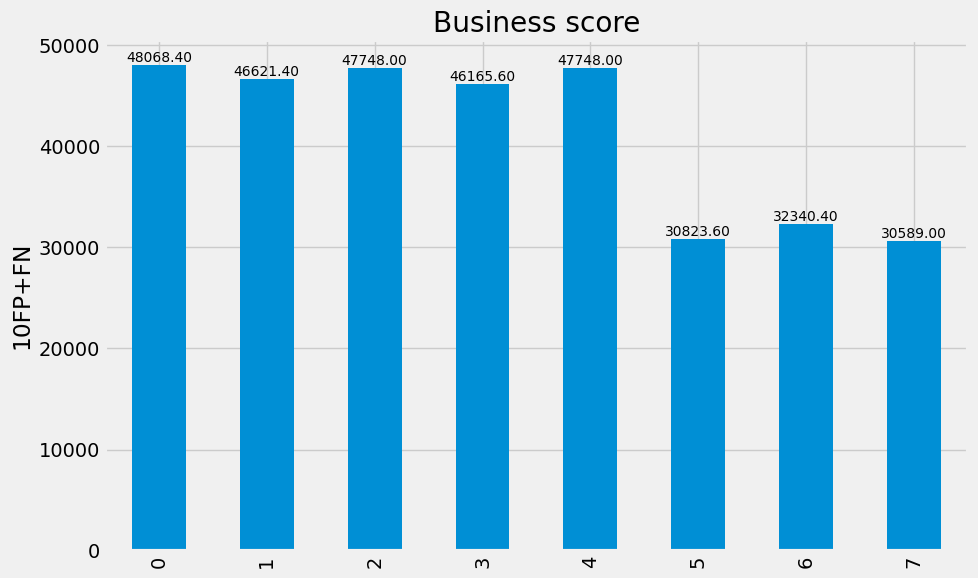

In [201]:
import matplotlib.pyplot as plt

# Tracer le graphique avec les valeurs absolues (sans modifier le DataFrame)
ax = pd_total['Business Score'].abs().plot(
    kind='bar',
    title='Business score',
    ylabel='10FP+FN',
    figsize=(10, 6)
)

# Ajouter des étiquettes au-dessus des barres
for p in ax.patches:  # Parcourt chaque barre
    ax.annotate(f'{p.get_height():.2f}',  # Format de l'étiquette (2 décimales)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position (centre de la barre)
                ha='center', va='bottom', fontsize=10)  # Alignement et style

# Afficher le graphique
plt.tight_layout()
plt.show()


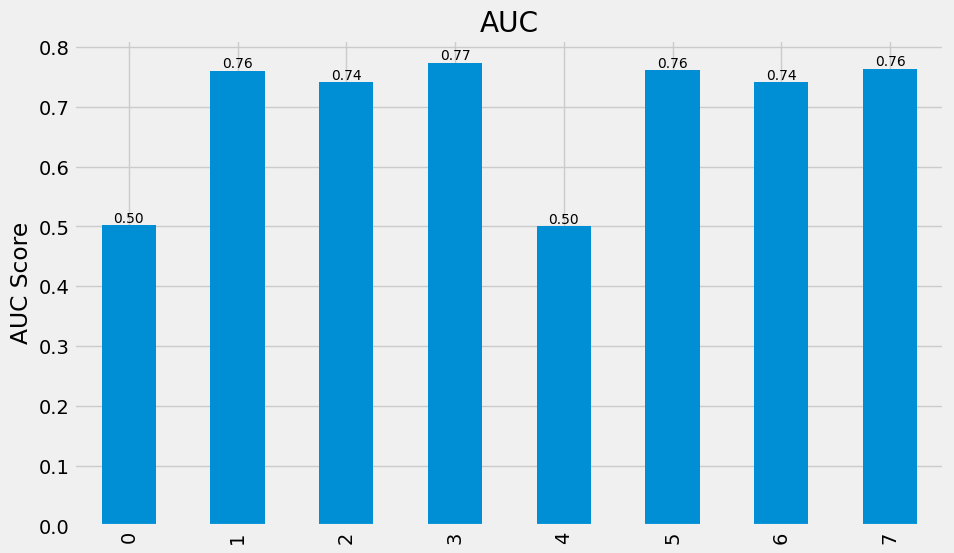

In [202]:
# Tracer le graphique et obtenir l'objet Axes
ax = pd_total['AUC'].plot(kind='bar', title='AUC', figsize=(10, 6), ylabel='AUC Score')

# Ajouter des étiquettes sur chaque barre
for container in ax.containers:  # Parcourt les groupes de barres
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)  # Format et style des étiquettes

# Afficher le graphique
plt.show()

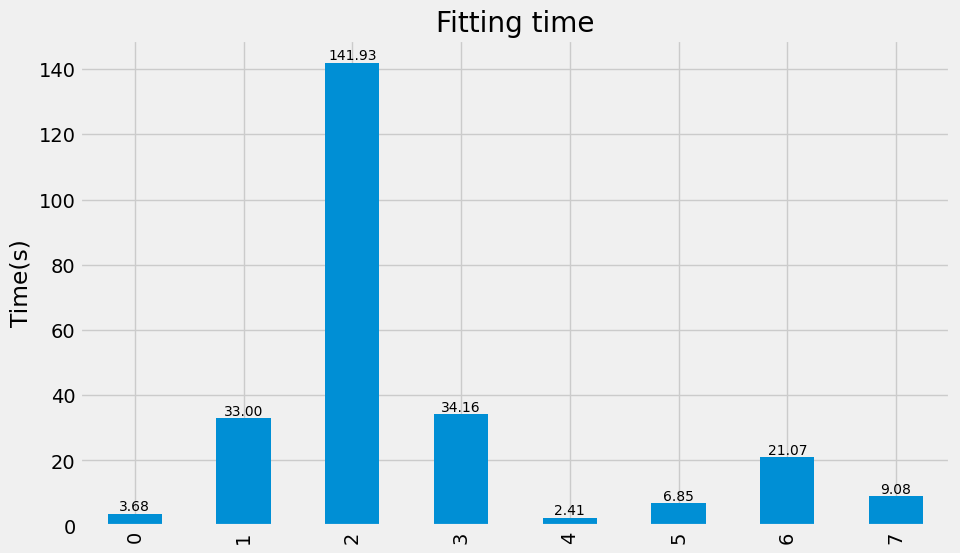

In [203]:
# Tracer le graphique et obtenir l'objet Axes
ax = pd_total['Fitting time'].plot(kind='bar', title='Fitting time', figsize=(10, 6), ylabel='Time(s)')

# Ajouter des étiquettes sur chaque barre
for container in ax.containers:  # Parcourt les groupes de barres
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)  # Format et style des étiquettes

# Afficher le graphique
plt.show()


4. Pourquoi exclure le Dummy Classifier pour tirer le meilleur modèle ?
Le Dummy Classifier est un modèle de référence (baseline) qui ne "réfléchit" pas :

Il utilise des stratégies simples comme prédire systématiquement la classe majoritaire (ou aléatoire, selon la configuration).
Ses performances servent de point de comparaison minimale. Si un modèle performant n'est pas nettement meilleur qu'un Dummy Classifier, cela signifie qu'il ne capture pas les motifs présents dans les données.

### Le meilleur modèle est donc le LGBM avec undersampling

Meilleurs params : {'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__is_unbalance': False}
Meilleur business score : -30589.0
AUC : 0.7637591697248778
Fitting time 7.491894245147705

### Seuil de classification

In [204]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import fbeta_score, f1_score
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline 
from sklearn.preprocessing import MinMaxScaler

In [205]:
X_train

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                 0             0                0             0   
1                 1             0                1             0   
2                 0             1                0             0   
3                 1             0                0             0   
4                 0             0                0             0   
...             ...           ...              ...           ...   
307506            0             0                1             0   
307507            1             0                0             0   
307508            1             0                0             0   
307509            1             0                0             0   
307510            1             0                1             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
0                         0.018801       -9461  ...   
1                         0.003541      -16765  ...   
2                         0.010032      -19046  ...   
3                         0.008019      -19005  ...   
4                         0.028663      -19932  ...   
...                            ...         ...  ...   
307506                    0.032561       -9327  ...   
307507                    0.025164      -20775  ...   
307508                    0.005002      -14966  ...   
307509                    0.005313      -11961  ...   
307510                    0.046220      -16856  ...   

        INSTAL_AMT_INSTALMENT_MEAN  INSTAL_AMT_INSTALMENT_SUM  \
0                     11559.247105                 219625.695   
1                     64754.586000                1618864.650   
2                      7096.155000                  21288.465   
3                     62947.088438                1007153.415   
4                     12666.444545                 835985.340   
...                            ...                        ...   
307506                 7492.924286                  52450.470   
307507                10069.867500                  60419.205   
307508                 4399.707857                  61595.910   
307509                10239.832895                 194556.825   
307510                41464.713649                3068388.810   

        INSTAL_AMT_PAYMENT_MIN  INSTAL_AMT_PAYMENT_MAX  \
0                     9251.775               53093.745   
1                     6662.970              560835.360   
2                     5357.250               10573.965   
3                     2482.920              691786.890   
4                        0.180               22678.785   
...                        ...                     ...   
307506                6605.910               12815.010   
307507               10046.880               10074.465   
307508                  27.270                5575.185   
307509                2296.440               19065.825   
307510                  34.965              669251.655   

        INSTAL_AMT_PAYMENT_MEAN  INSTAL_AMT_PAYMENT_SUM  \
0                  11559.247105              219625.695   
1                  64754.586000             1618864.650   
2                   7096.155000   

In [206]:
y_train

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    1.0
307510    0.0
Name: TARGET, Length: 291377, dtype: float64

In [207]:
print("Shape de X_train :", X_train.shape)
print("Shape de y_train :", y_train.shape)

Shape de X_train : (291377, 550)
Shape de y_train : (291377,)


In [208]:
# Associer X et y à X_train et y_train
X = X_train.copy()
y = y_train.copy()

# Réinitialiser/Réindexer X et y pour garantir un RangeIndex
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [209]:
print(y.isnull().sum())  # Nombre de NaN dans y
print(y.unique())        # Vérifiez les valeurs uniques (NaN pourrait apparaître)

0
[1. 0.]


In [210]:
# y.fillna(y.mode()[0], inplace=True)  # Remplace les NaN par la valeur la plus fréquente

In [211]:
print("Shape de X :", X.shape)
print("Shape de y :", y.shape)

Shape de X : (291377, 550)
Shape de y : (291377,)


In [212]:
print("Shape de X :", X.shape)
print("Shape de y :", y.shape)

Shape de X : (291377, 550)
Shape de y : (291377,)


Meilleurs params : {'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__is_unbalance': False} Meilleur business score : -30589.0 AUC : 0.7637591697248778 Fitting time 7.491894245147705

In [213]:
# Suppression de la colonne 'SK_ID_CURR' dans X_train et X_test avant de les passer au modèle
X_train = X_train.drop(columns=['SK_ID_CURR'], errors='ignore')

In [232]:
X.shape

(291377, 550)

In [214]:
# Démarrage du run dans MLflow
with mlflow.start_run(run_name='LGBM_with_undersampling'):
    
    # Création du pipeline avec undersampling, scaling et LGBM
    pipeline = make_imb_pipeline(undersampler, scaler, lgbmc)    

    # Grid search pour chercher les meilleurs paramètres
    grid_search = RandomizedSearchCV(
        estimator=pipeline, 
        param_distributions=param_grid_lgbm, 
        cv=5, 
        scoring=scoring, 
        refit='business_scorer', 
        return_train_score=True
    )
    
    # StratifiedKFold pour obtenir les indices d'entraînement et de test
    skf = StratifiedKFold(n_splits=5)
    
    # DataFrame pour stocker les scores business
    df_business = pd.DataFrame()

    # Loop pour chaque fold
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Fold number {i}")
        
        # Diviser les données en train et test
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        # Entraînement du modèle avec GridSearchCV
        grid_search.fit(X_train, y_train)
        
        # Meilleur modèle après grid search
        best_model = grid_search.best_estimator_
        
        # Récupérer les probabilités de la classe positive
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

        business_scores = []  # Liste pour stocker les scores business
        
        # Appliquer des seuils entre 0.2 et 0.8
        for threshold in np.arange(0.2, 0.8, 0.05):
            # Convertir les probabilités en prédictions binaires en fonction du seuil
            y_pred_binary = (y_pred_proba >= threshold).astype(int)
            
            # Calculer le business score pour ce seuil
            score = business_scorer(y_test, y_pred_binary)  # Utilisation de y_test ici pour calculer le score business
            business_scores.append(score)

        # Ajouter les scores business pour ce fold
        df_business[f'fold_{i}'] = business_scores  # Stocker les scores business pour ce fold

    # Affichage des scores business pour chaque seuil
    print("Business scores across folds:")
    print(df_business)

    # Trouver le meilleur seuil (celui avec le meilleur score business)
    best_threshold = df_business.mean(axis=1).idxmax() * 0.05 + 0.2
    print(f"Best threshold based on business score: {best_threshold}")
    
    # Log des résultats dans MLflow
    mlflow.log_metric("Best threshold", best_threshold)
    mlflow.log_metric("Mean business score", df_business.mean(axis=1).max())
    
    # Log du modèle final
    mlflow.sklearn.log_model(best_model, "best_model")

# Fin du run MLflow
mlflow.end_run()


Fold number 0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 15279, number of negative: 15279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.192817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50293
[LightGBM] [Info] Number of data points in the train set: 30558, number of used features: 481
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM in

2025/01/22 19:51:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBM_with_undersampling at: http://localhost:5001/#/experiments/0/runs/253fbf1b06224acf8e4923d6b1ec29f8
🧪 View experiment at: http://localhost:5001/#/experiments/0


In [215]:
# # Initialize a DataFrame to store business scores
# df_business = pd.DataFrame()

# skf = StratifiedKFold(n_splits=5)

# # Best model (LGBM without undersampling)
# lgbm_final = LGBMClassifier(
#     n_estimators=100,         # Number of trees
#     max_depth=6,              # Best depth found
#     learning_rate=0.05,        # Learning rate
#     is_unbalance=False         # Account for class imbalance
# )

# # Loop over the folds
# for i, (train_index, test_index) in enumerate(skf.split(X, y)):
#     print(f'Fold number {i}')

#     X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
#     y_train, y_test = y.loc[train_index], y.loc[test_index]
    
#     # Create a pipeline with scaler and LGBMClassifier
#     pipeline = make_pipeline(scaler, lgbm_final)
#     pipeline.fit(X_train, y_train)
    
#     # Predictions (probabilities for the positive class)
#     y_pred = pipeline.predict_proba(X_test)[:, 1]
    
#     business_scores = []  # List to store business scores
    
#     # Calculate business scores for different thresholds
#     for threshold in np.arange(0.2, 0.8, 0.05):
#         # Apply the threshold to the predicted probabilities
#         y_pred_binary = (y_pred >= threshold).astype(int)
        
#         # Calculate the business score for the current threshold
#         score = business_scorer(y_test, y_pred_binary)
#         business_scores.append(score)
        
#     # Add business scores for this fold
#     df_business[f'fold_{i}'] = business_scores  # Store business scores for this fold

# # Display final results
# print("Business scores across folds:")
# print(df_business)

# # Find the best threshold (the one with the highest business score)
# best_threshold = df_business.mean(axis=1).idxmax() * 0.05 + 0.2
# print(f"Best threshold based on business score: {best_threshold}")

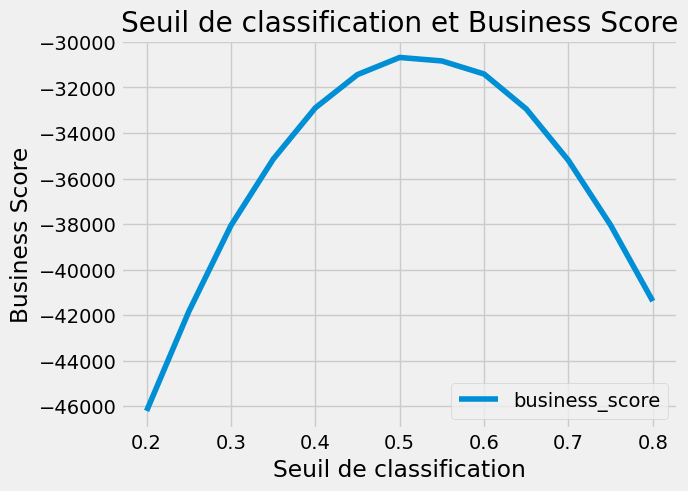

In [216]:
import matplotlib.pyplot as plt

# Assuming df_business contains the business scores across folds, with rows corresponding to different thresholds
# We calculate the mean business scores across folds for each threshold
df_result = df_business.mean(axis=1)

# Set the index to the threshold values
df_result.index = np.arange(0.2, 0.8, 0.05)

# Rename the column to 'business_score'
df_result = df_result.to_frame(name='business_score')

# Plot the business score against the thresholds
df_result.plot(kind='line', xlabel='Seuil de classification', ylabel='Business Score', title='Seuil de classification et Business Score')

# Show the plot
plt.show()


In [217]:
# Find the threshold that corresponds to the best (highest) business score
best_threshold_index = df_business.mean(axis=1).idxmax()  # This gives the index of the highest business score
best_threshold = np.round(best_threshold_index * 0.05 + 0.2, 2)  # Convert the index back to the threshold value

# Retrieve the business score for this best threshold
best_business_score = df_business.mean(axis=1).iloc[best_threshold_index]

print(f"The best threshold based on the business score is: {best_threshold}")
print(f"The business score at this threshold is: {best_business_score}")



The best threshold based on the business score is: 0.5
The business score at this threshold is: -30682.2


### Feature importance

In [218]:
import shap

In [219]:
# Fit the model
lgbm_final = LGBMClassifier(
    n_estimators=100,         # Number of trees
    max_depth=7,              # Best depth found
    learning_rate=0.05,        # Learning rate
    is_unbalance=False         # Account for class imbalance
).fit(X,y)

[LightGBM] [Info] Number of positive: 23874, number of negative: 267503
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.443392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55514
[LightGBM] [Info] Number of data points in the train set: 291377, number of used features: 511
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081935 -> initscore=-2.416341
[LightGBM] [Info] Start training from score -2.416341


In [220]:
# Access the booster after fitting the model
booster = lgbm_final.booster_

# Get the feature importances based on 'split' (number of times a feature is used in splits)
importances = booster.feature_importance(importance_type='split')

# Print the importances
print(importances)

[ 67  24   0   0   2  39  72  47   4  84  62  11  40   0   0   1   0   0
   0   1   3  20   1   0   0   0   8   0   0 176 156   1  12   0   6   6
   0  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
   0   0   0   0   0   0   3   1  10   0   0   0   0   0   0   0   0   0
   0   0   0   3   0   0   9   0  42   0   0  18   0  24   0   0   0   0
   0   0   0   0   0   0   0   0   0   8   3   0   0   0   2   1   0   0
   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1
   0   0   2   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   1   0   0   0   0   0   0   0   0   6   0   0   2   0  13  15   1
  43 190   2  17  19   4   0   7  11   5   0   0  13  10   9   2  19   7
  17   1   0   0   3   3   0  19   1   0   0   0   0   0   0   0   2   0
   0   1   0   0   0   0   0  26   0   9   0   0   

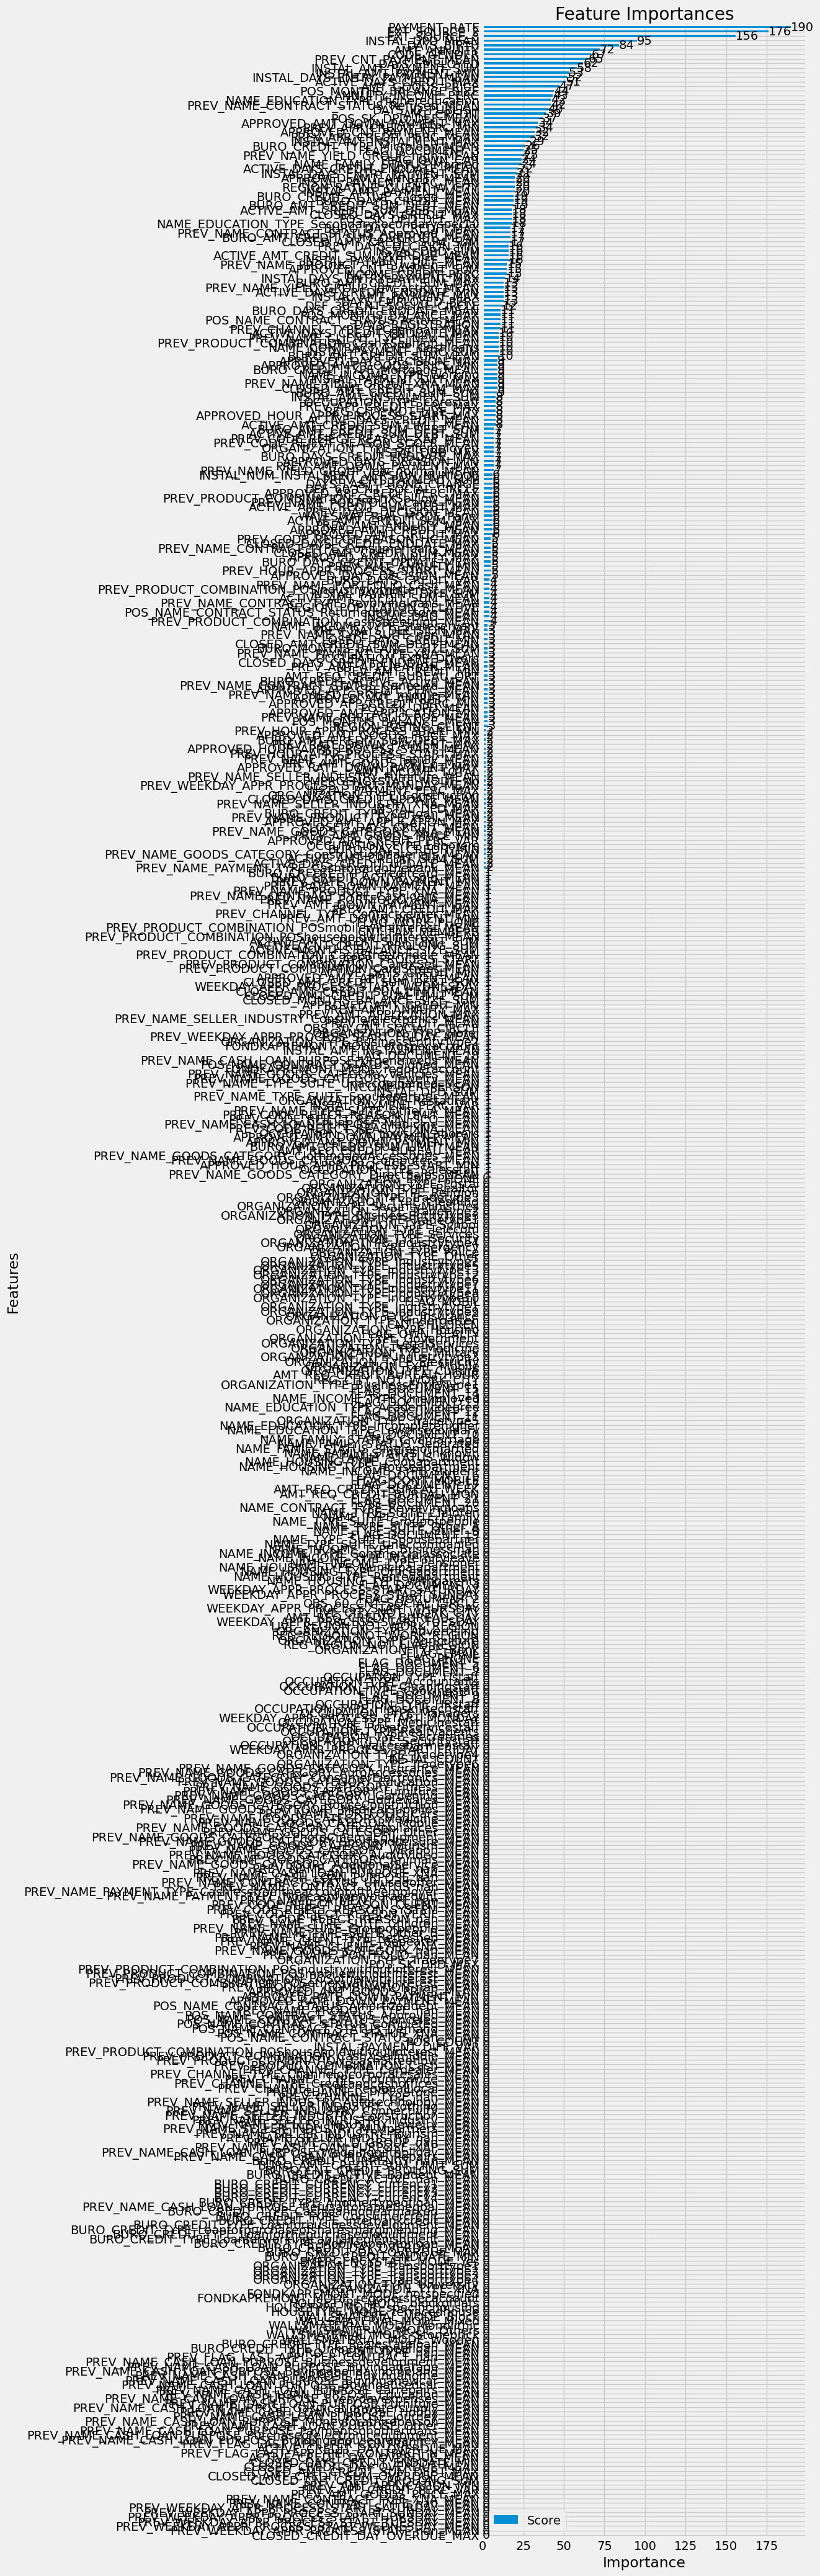

In [221]:
# Get the feature names from X (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame with the feature names and their importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': importances
})

# Sort the DataFrame by score
importances_df = importances_df.sort_values(by='Score', ascending=True)

# Plot the bar chart
ax = importances_df.plot.barh(x='Feature', y='Score', figsize=(6, 50))

# Add bar labels
ax.bar_label(ax.containers[0])

# # Rotate the y-axis labels if necessary (0 means no rotation)
# plt.yticks(rotation=0)  # Rotate y-axis labels to be horizontal

# # Adjust the layout to ensure everything fits properly
# plt.tight_layout()

# Show the plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

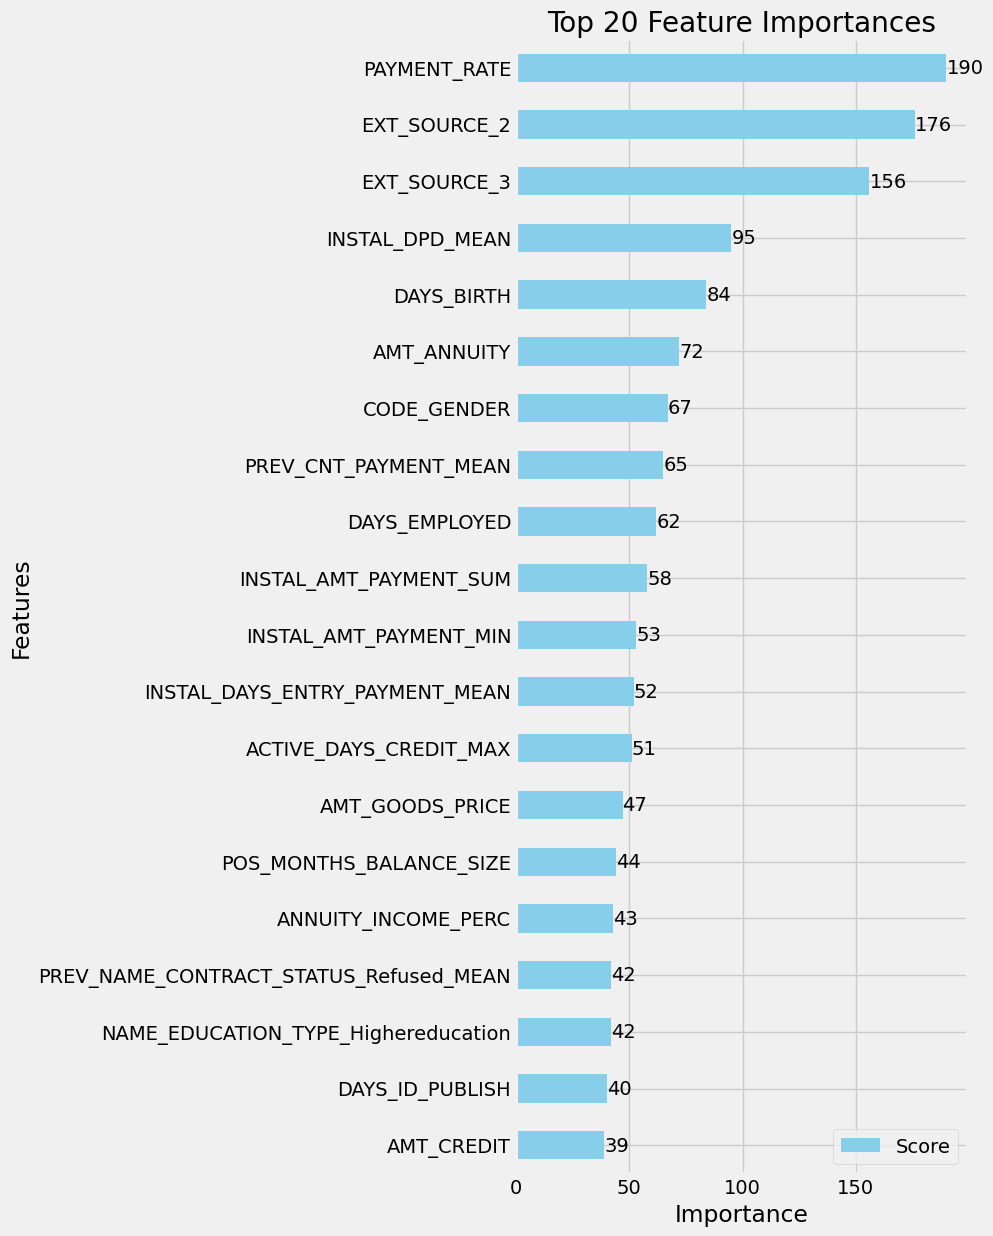

In [222]:
# Sort the DataFrame by score (importance) in descending order
importances_df = importances_df.sort_values(by='Score', ascending=False)

# Select the top 20 most important features
top_20_importances = importances_df.head(20)

# Plot the top 20 most important features with the largest at the top
ax = top_20_importances.plot.barh(x='Feature', y='Score', figsize=(10, 12), color='skyblue')  # Adjust the figure size

# Add bar labels
ax.bar_label(ax.containers[0])

# Rotate the y-axis labels for readability
plt.yticks(rotation=0)  # You can change the rotation if needed (e.g., 45 degrees)

# Reverse the y-axis to put the largest at the top
ax.invert_yaxis()

# Adjust the layout to ensure everything fits properly
plt.tight_layout()

# Show the plot
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



### Interprétation importance globale
L'importance globale des variables est calculée en considérant leur rôle dans l'ensemble des prédictions du modèle.

Variables les plus importantes :

PAYMENT_RATE (190) : Cette variable est la plus influente pour le modèle, probablement liée à un ratio clé comme le ratio d'endettement ou le taux de remboursement.
EXT_SOURCE_2 (176) et EXT_SOURCE_3 (156) : Ces variables externes jouent un rôle majeur, souvent utilisées comme indicateurs de risque ou d'autres scores externes.
INSTAL_DPD_MEAN (95) : Le nombre moyen de jours de retard dans les paiements est également une mesure importante pour évaluer le comportement de paiement.
Variables secondaires :

Variables comme DAYS_BIRTH (84), AMT_ANNUITY (72), et CODE_GENDER (67) contribuent également de manière significative, mais avec un poids moindre que les variables clés.
Structure générale :

Les 20 premières variables représentent une grande partie de l'importance globale, mais il y a un long "tail" de 541 autres caractéristiques ayant une influence marginale.
La dominance de quelques variables clés suggère que le modèle s'appuie fortement sur ces caractéristiques pour les décisions.


### Importance locale

100%|===================| 58148/58275 [06:13<00:00]        

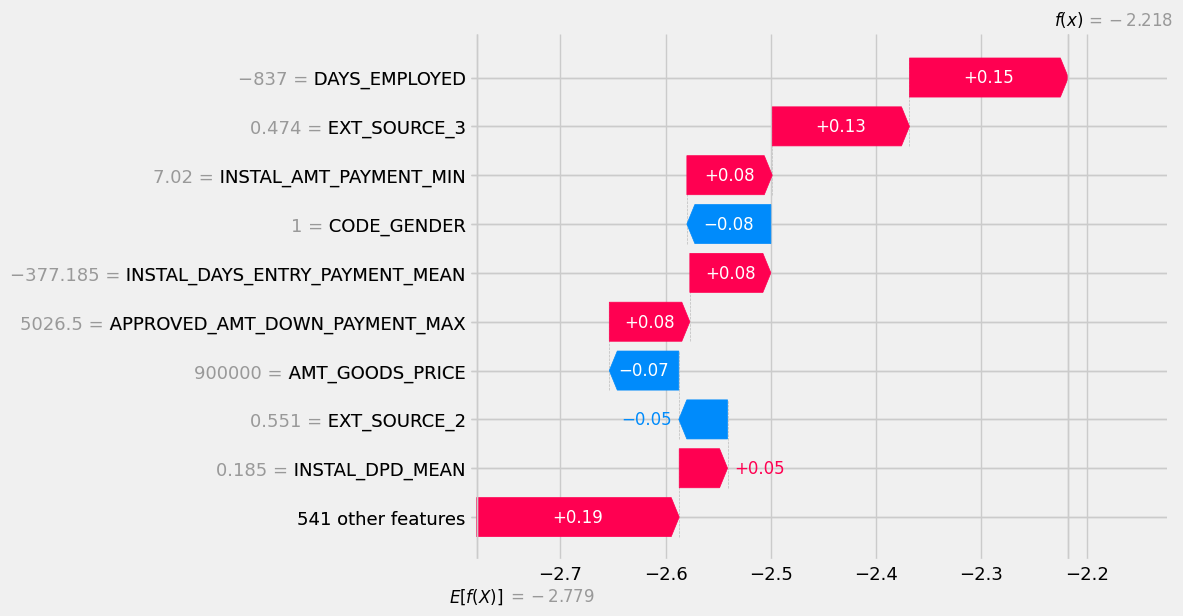

In [223]:
# import shap
# import matplotlib.pyplot as plt

# Étape 1 : Créez un explainer basé sur le modèle LightGBM
explainer = shap.Explainer(lgbm_final, X_train)  # Remplacez `lgbm_final` par votre modèle et `X_train` par vos données d'entraînement

# Étape 2 : Calculez les valeurs SHAP pour un échantillon spécifique
index_to_explain = 0  # Index de l'exemple pour lequel vous voulez l'importance locale
shap_values = explainer(X_test)  # Remplacez X_test par les données de test

# Étape 3 : Visualisez l'importance locale pour l'exemple choisi
shap.waterfall_plot(shap_values[index_to_explain])

# Étape 4 (optionnel) : Visualisez les valeurs SHAP pour plusieurs exemples
shap.force_plot(
    explainer.expected_value, 
    shap_values[index_to_explain].values, 
    X_test.iloc[index_to_explain]
)


#### Interprétation résultat importance locale
Score global de prédiction :

Le score final (E[f(x)]) pour cet exemple est −2.779
−2.779, correspondant à une probabilité ou une décision associée à la classe prédite (par exemple, dans un cas de scoring pour risque de crédit, cela peut signifier un "refus").
Variables qui augmentent la probabilité (positivement) :

DAYS_EMPLOYED (+0.15) : Ce facteur a contribué significativement à augmenter le score vers une prédiction de classe donnée. Par exemple, une durée importante d'emploi peut réduire le risque dans certains contextes.
EXT_SOURCE_3 (+0.13) : Cette variable a également une contribution notable dans le même sens.
Autres variables positives : Les variables comme INSTALL_AMT_PAYMENT_MIN, CODE_GENDER, et INSTAL_DAYS_ENTRY_PAYMENT_MEAN ont eu un impact positif mais moindre.
Variables qui réduisent le score (négativement) :

EXT_SOURCE_2 (-0.05) et AMT_GOODS_PRICE (-0.07) : Ces variables ont eu un effet atténuant, réduisant le score global.
Rôle global négatif : Certaines variables comme INSTAL_DPD_MEAN (retards moyens) et APPROVED_AMT_DOWN_PAYMENT_MAX ont contribué à diminuer la probabilité.
Interprétation contextuelle :

Cette décomposition permet de comprendre pourquoi le modèle a pris une décision spécifique pour cet exemple. Les contributions positives et négatives des variables montrent clairement quelles caractéristiques influencent la prédiction.

#### résumé global basé sur les impacts locaux de chaque caractéristique sur plusieurs exemples

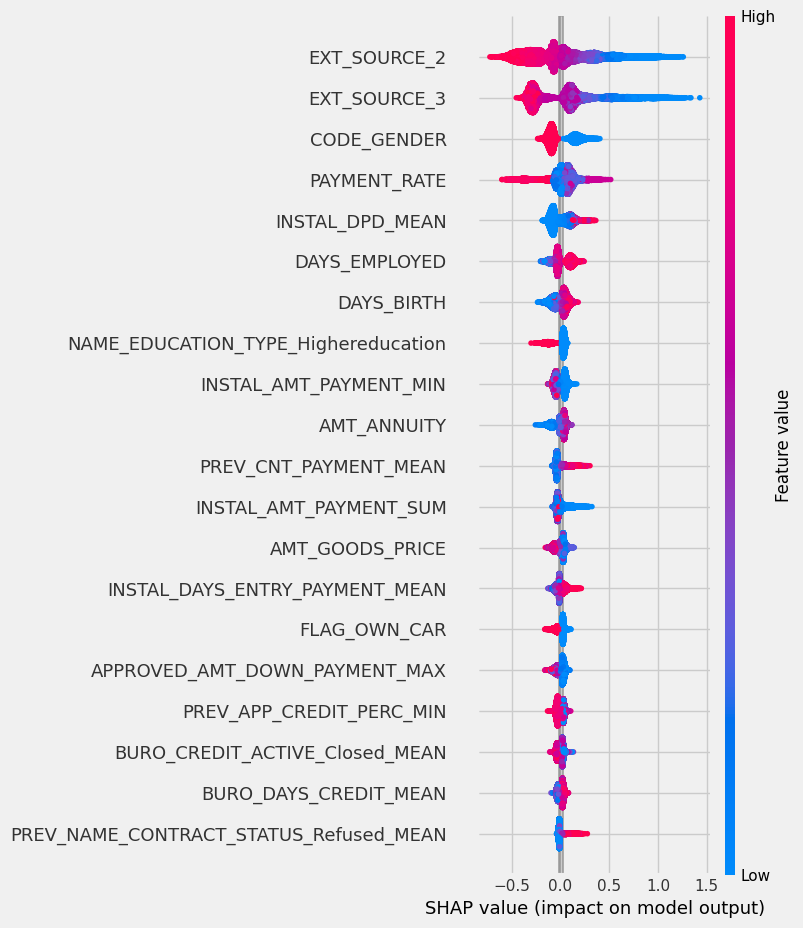

In [224]:
# Résumé SHAP global (basé sur les valeurs locales)
shap.summary_plot(shap_values, X_test)


### Description du graphique
Graphique en résumé SHAP :

Chaque point représente une observation (ou un individu) de votre dataset.
Les points sont regroupés par variable (axe vertical).
Couleur : Elle indique la valeur de la variable pour l’observation. Rouge = valeur élevée, bleu = valeur faible.
Position horizontale (SHAP value) : Indique l'impact de la variable sur la prédiction du modèle (positif ou négatif).
Importance globale des variables :

Les variables les plus influentes sont en haut (par ordre d’importance).
La largeur des bandes reflète la variabilité des impacts locaux d’une variable.
Interprétation des variables principales
1. EXT_SOURCE_2 et EXT_SOURCE_3 :
Ce sont les variables les plus importantes pour le modèle.
Rouge (valeurs élevées) : A tendance à avoir un impact positif (améliore la prédiction, par ex., réduit le risque).
Bleu (valeurs faibles) : A un impact négatif (augmente le risque).
Ces variables peuvent correspondre à des scores externes, typiquement bien corrélés avec la probabilité d’un bon comportement (comme un remboursement de prêt).
2. CODE_GENDER:
A un impact modéré mais systématique.
Selon les valeurs locales (bleu ou rouge), l’impact peut être positif ou négatif.
Cela reflète probablement une corrélation entre le genre et certaines caractéristiques du modèle, sans que cela implique une causalité directe.
3. PAYMENT_RATE:
Impact fort et central.
Rouge (valeurs élevées) : Indique souvent un bon comportement de remboursement (par ex., paiement rapide ou respect des échéances).
Bleu (valeurs faibles) : Contribue négativement aux prédictions, indiquant potentiellement un risque accru.
4. INSTAL_DPD_MEAN (retards moyens) :
Bleu (faible retard ou aucun retard) : Impact positif sur le score.
Rouge (fort retard) : Impact négatif, indique un risque accru.
Cette variable capture la régularité des paiements précédents.
5. DAYS_EMPLOYED et DAYS_BIRTH:
DAYS_EMPLOYED (ancienneté professionnelle) :
Rouge (longue ancienneté) : Impact positif.
Bleu (faible ancienneté) : Impact négatif, potentiellement un signe de moindre stabilité professionnelle.
DAYS_BIRTH (âge) :
Rouge (âge élevé) : Impact positif, peut-être lié à une meilleure stabilité.
Bleu (âge jeune) : Impact négatif, souvent associé à des risques plus élevés.
6. NAME_EDUCATION_TYPE_Highereducation:
Les individus ayant un niveau d’éducation plus élevé (valeurs rouges) ont un impact positif sur la prédiction.
7. Variables liées aux paiements (INSTAL_AMT_PAYMENT_MIN, AMT_ANNUITY, etc.) :
Ces variables montrent que des montants plus faibles (bleu) ou des paiements moins fréquents peuvent avoir un impact négatif.
Les variables associées à des paiements réguliers et élevés tendent à avoir un impact positif.
Synthèse globale
Structure hiérarchique :

Le modèle est fortement influencé par les scores externes (EXT_SOURCE_2, EXT_SOURCE_3), des facteurs comportementaux (PAYMENT_RATE, INSTAL_DPD_MEAN), et des indicateurs démographiques (DAYS_BIRTH, CODE_GENDER).
Impact des valeurs élevées/faibles :

Rouge (valeurs élevées) tend souvent à avoir un impact positif, signifiant une meilleure stabilité ou un risque moindre.
Bleu (valeurs faibles) est souvent lié à un impact négatif, ce qui peut refléter des comportements ou des caractéristiques associées à un risque accru.
Utilité pour l’optimisation :

Ce résumé global permet de prioriser les variables à surveiller ou à ajuster pour améliorer les prédictions ou réduire les biais potentiels du modèle.

In [225]:
import pickle
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

# 1. Appliquer un MinMaxScaler sur X -> X_scaled
mms = MinMaxScaler()  # Initialiser le MinMaxScaler
X_scaled = mms.fit_transform(X)  # Appliquer le MinMaxScaler sur X

In [226]:
# 2. Enregistrer le MinMaxScaler sous format pickle
with open('minmax_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(mms, scaler_file)  # Sauvegarder l'objet MinMaxScaler

print("MinMaxScaler enregistré sous le nom 'minmax_scaler.pkl'.")

MinMaxScaler enregistré sous le nom 'minmax_scaler.pkl'.


In [227]:
# 3. Créer un modèle LightGBM avec les meilleurs hyperparamètres et fit sur X_scaled et y
# Utilisation des paramètres de lgbm_final
lgbm = lgb.LGBMClassifier(
    n_estimators=100,         # Nombre d'arbres
    max_depth=7,              # Profondeur maximale
    learning_rate=0.05,       # Taux d'apprentissage
    is_unbalance=False        # Gestion du déséquilibre des classes
)

# Entraîner le modèle sur X_scaled et y
lgbm.fit(X_scaled, y)

# Enregistrer le modèle LightGBM au format pickle
with open('lightgbm_model.pkl', 'wb') as model_file:
    pickle.dump(lgbm, model_file)  # Sauvegarder le modèle entraîné

print("Modèle LightGBM enregistré sous le nom 'lightgbm_model.pkl'.")

[LightGBM] [Info] Number of positive: 23874, number of negative: 267503
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.404300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55510
[LightGBM] [Info] Number of data points in the train set: 291377, number of used features: 511
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081935 -> initscore=-2.416341
[LightGBM] [Info] Start training from score -2.416341
Modèle LightGBM enregistré sous le nom 'lightgbm_model.pkl'.


In [228]:
X_test.to_parquet("data.parquet",index=False)

In [229]:
X_test.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
232393            1             1                0             2   
232401            0             0                0             2   
232412            0             0                0             2   
232416            0             0                1             0   
232423            1             0                0             1   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
232393           72000.0   1078200.0      31653.0         900000.0   
232401          225000.0    808650.0      31464.0         675000.0   
232412          180000.0   1525482.0      42079.5        1363500.0   
232416          112500.0    447768.0      30051.0         405000.0   
232423          202500.0    755190.0      38740.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
232393                    0.007020      -16402  ...   
232401                    0.006671      -14900  ...   
232412                    0.010966      -16275  ...   
232416                    0.018029      -15876  ...   
232423                    0.010032      -16852  ...   

        INSTAL_AMT_INSTALMENT_MEAN  INSTAL_AMT_INSTALMENT_SUM  \
232393                13511.413333                 364808.160   
232401                26677.890000                 827014.590   
232412                14104.616932                1861809.435   
232416                24228.722571                 848005.290   
232423                46599.072500                 838783.305   

        INSTAL_AMT_PAYMENT_MIN  INSTAL_AMT_PAYMENT_MAX  \
232393                   7.020              119342.160   
232401                  66.645              246812.310   
232412                  23.805              162272.970   
232416                 103.185               84816.090   
232423                   2.295              636192.945   

        INSTAL_AMT_PAYMENT_MEAN  INSTAL_AMT_PAYMENT_SUM  \
232393             12834.100000              346520.700   
232401             26554.784516              823198.320   
232412             13952.337955             1841708.610   
232416             18586.649571              650532.735   
232423             46215.170000              831873.060   

        INSTAL_DAYS_ENTRY_PAYMENT_MAX  INSTAL_DAYS_ENTRY_PAYMENT_MEAN  \
232393                          -46.0                     -377.185185   
232401                           -3.0                     -460.935484   
232412                          -35.0                    -1348.462121   
232416                         -348.0                     -824.514286   
232423                          -39.0                    -1557.388889   

        INSTAL_DAYS_ENTRY_PAYMENT_SUM  INSTAL_COUNT  
232393                       -10184.0          27.0  
232401                       -14289.0          31.0  
232412                      -177997.0         132.0  
232416                       -28858.0          35.0  
232423                       -28033.0          18.0  

[5 rows x 550 columns]

#### structure complète pour créer une API à l'aide de FastAPI qui répondra à votre besoin. Cette API :

Charge le MinMaxScaler et le modèle LightGBM sauvegardés au format pickle.

Reçoit une ligne de features via une requête POST.

Applique le MinMaxScaler pour normaliser les données.

Prédit le résultat avec le modèle LightGBM.

Renvoie la prédiction sous forme de réponse JSON.

### à installer en bash
pip install fastapi uvicorn scikit-learn lightgbm

### Code pour l'API

In [230]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pickle

# Charger le MinMaxScaler et le modèle LightGBM
with open('minmax_scaler.pkl', 'rb') as scaler_file:
    minmax_scaler = pickle.load(scaler_file)

with open('lightgbm_model.pkl', 'rb') as model_file:
    lgbm_model = pickle.load(model_file)

# Créer une application FastAPI
app = FastAPI()

# Définir un modèle pour valider les données d'entrée
class ClientFeatures(BaseModel):
    features: list[float]  # Liste des valeurs des features du client

# Endpoint pour la prédiction
@app.post("/predict/")
def predict(client_features: ClientFeatures):
    # Convertir les données reçues en array NumPy
    features_array = np.array(client_features.features).reshape(1, -1)

    # Appliquer le MinMaxScaler
    features_scaled = minmax_scaler.transform(features_array)

    # Effectuer la prédiction avec le modèle LightGBM
    prediction = lgbm_model.predict(features_scaled)

    # Prédire aussi la probabilité si nécessaire
    prediction_proba = lgbm_model.predict_proba(features_scaled).tolist()

    # Renvoyer la prédiction et les probabilités
    return {
        "prediction": int(prediction[0]),  # Prédiction binaire (0 ou 1)
        "probabilities": prediction_proba  # Probabilités des classes
    }


### Lancer l'API :

Enregistrez ce fichier sous le nom api.py.
Lancez l'API en exécutant en bash
uvicorn api:app --reload --host 0.0.0.0 --port 8000
